**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

**CCRE**

In [2]:
### set file path
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")
dat_ccre = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat_ccre = dat_ccre %>% 
    dplyr::select(Chrom, Start, End, Name, Label1) %>% 
    dplyr::rename(Label = Label1) %>% 
    distinct

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535      5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


**ASTARR**

In [3]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::filter(Strand == "unstranded")

### assign
dat_astarr_gata1 = dat
print(dim(dat))
head(dat)

[1] 2000151       7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786500,47786501,unstranded,GATA1,0,0
chrX,47786501,47786502,unstranded,GATA1,0,0
chrX,47786502,47786503,unstranded,GATA1,0,0
chrX,47786503,47786504,unstranded,GATA1,0,0
chrX,47786504,47786505,unstranded,GATA1,0,0
chrX,47786505,47786506,unstranded,GATA1,0,0


**Library size**

In [4]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat_lib = read_tsv(fpath, show_col_types = FALSE)
dat_lib = dat_lib %>% spread(Group, Size)
dat_lib

Region,Strand,Input,Output
<chr>,<chr>,<dbl>,<dbl>
FADS,stranded_neg,6318496,20165763
FADS,stranded_pos,6408832,21584874
GATA1,stranded_pos,26777806,91437834
MYC,stranded_pos,22526034,42384061


In [5]:
cnt_inp = 26777806
cnt_out = 91437834

**TMPRA**

In [6]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130_Ratio.GATA1.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::select(-FC)

#dat$Input  = dat$Input  / cnt_inp
#dat$Output = dat$Output / cnt_out

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 1820026       5


Chrom,Start,End,Input,Output
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786402,2117,10474
chrX,47786402,47786403,2117,10474
chrX,47786403,47786404,2117,10474
chrX,47786404,47786405,2117,10474
chrX,47786405,47786406,2117,10474
chrX,47786406,47786407,2117,10474


## Preprocess

In [7]:
###
dat = dat_astarr_gata1
dat = dat %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0)

###
mu_inp = mean(dat$Input)
mu_out = mean(dat$Output)

###
dat_cov = dat_astarr_gata1
dat_cov$Input_R  = dat_cov$Input  / mu_inp #mean(dat_cov$Input)
dat_cov$Output_R = dat_cov$Output / mu_out #mean(dat_cov$Output)

###
pcnt   = max(dat_cov$Input,   dat_cov$Output)
pcnt_R = max(dat_cov$Input_R, dat_cov$Output_R)

###
dat_lfc = dat_cov %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC        = Output / Input,
        Log2FC    = log2(Output / Input),
        pLog2FC   = log2((Output+pcnt)  / (Input+pcnt)),
        FC_R      = Output_R / Input_R,
        Log2FC_R  = log2(Output_R / Input_R),
        pLog2FC_R = log2((Output_R+pcnt_R)  / (Input_R+pcnt_R)))


### assign
dat_cov_astarr = dat_cov
dat_lfc_astarr = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(pcnt)
print(pcnt_R)

[1] 2000151       9
[1] 1636866      15
[1] 0.01934534
[1] 134.1916


In [8]:
###
dat = dat_tmpra_gata1
dat = dat %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0)

###
mu_inp = mean(dat$Input)
mu_out = mean(dat$Output)

###
dat_cov = dat_tmpra_gata1
dat_cov$Input_R  = dat_cov$Input  / mu_inp #mean(dat_cov$Input)
dat_cov$Output_R = dat_cov$Output / mu_out #mean(dat_cov$Output)

###
pcnt   = max(dat_cov$Input,   dat_cov$Output)
pcnt_R = max(dat_cov$Input_R, dat_cov$Output_R)

###
dat_lfc = dat_cov %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC        = Output / Input,
        Log2FC    = log2(Output / Input),
        pLog2FC   = log2((Output+pcnt)  / (Input+pcnt)),
        FC_R      = Output_R / Input_R,
        Log2FC_R  = log2(Output_R / Input_R),
        pLog2FC_R = log2((Output_R+pcnt_R)  / (Input_R+pcnt_R)))


### assign
dat_cov_tmpra = dat_cov
dat_lfc_tmpra = dat_lfc
print(dim(dat_cov))
print(dim(dat_lfc))
print(pcnt)
print(pcnt_R)

[1] 1820026       7
[1] 1820023      13
[1] 138896
[1] 112.6563


## Distribution ASTARR

In [9]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot(dat_lfc, aes(x=pLog2FC)) + 
    geom_histogram(bins = 50) + 
    scale_y_log10() +
    theme_cowplot() +
    labs(title="ASTARR")

gp2 = ggplot(dat_lfc, aes(x=pLog2FC_R)) + 
    geom_histogram(bins = 50) + 
    scale_y_log10() +
    theme_cowplot() +
    labs(title="ASTARR")

In [10]:
dat_lfc = dat_lfc_tmpra
gp3 = ggplot(dat_lfc, aes(x=pLog2FC)) + 
    geom_histogram(bins = 50) + 
    scale_y_log10() +
    theme_cowplot() +
    labs(title="TMPRA")

gp4 = ggplot(dat_lfc, aes(x=pLog2FC_R)) + 
    geom_histogram(bins = 50) + 
    scale_y_log10() +
    theme_cowplot() +
    labs(title="TMPRA")

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 3 rows containing missing values (geom_bar).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 3 rows containing missing values (geom_bar).”


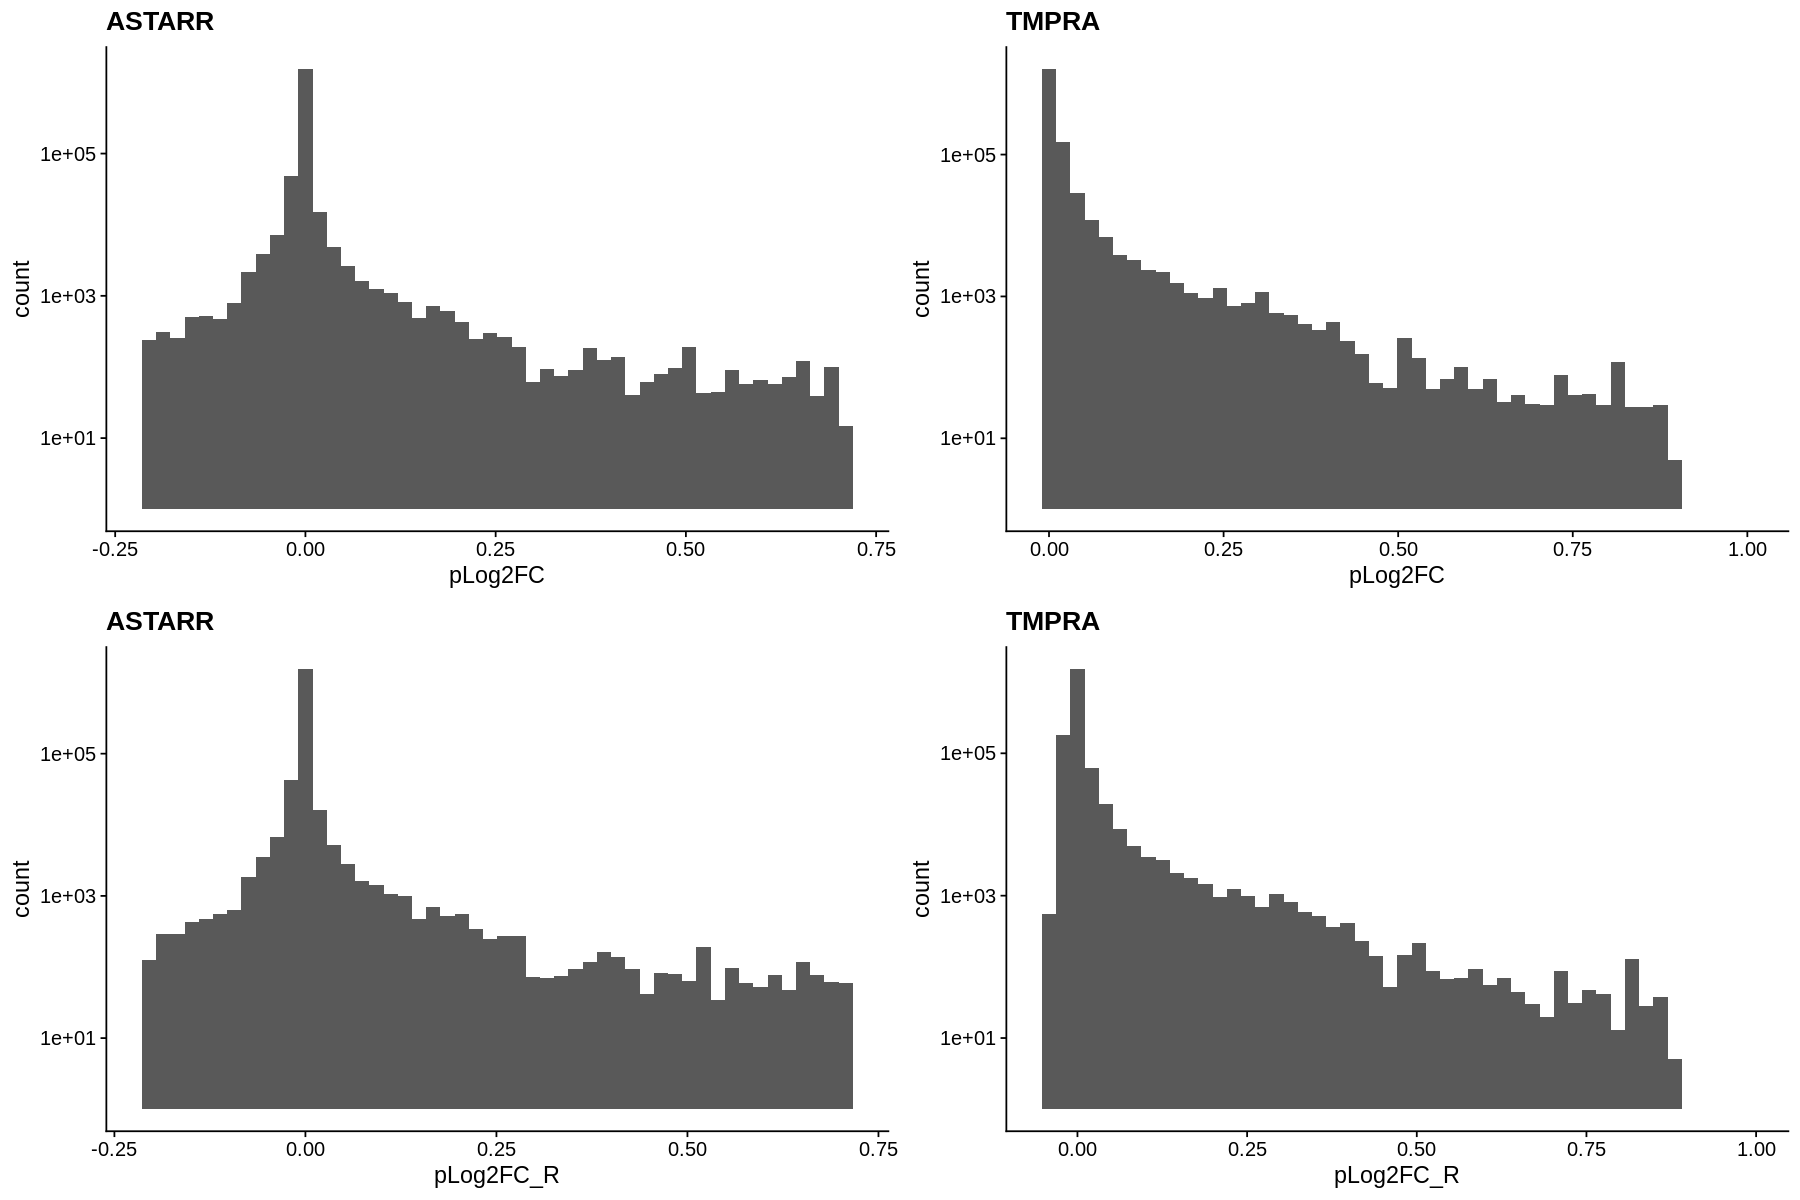

In [11]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(gp1, gp3, gp2, gp4, align="v", ncol=2)

## Trackplot ASTARR

In [12]:
mycolors = c(
    "#1f78b4",
    "#33a02c",
    "#e31a1c",
    "#ff7f00",
    "#6a3d9a",
    "#e7298a",
    "#b15928",
    "#8dd3c7", 
    "#80b1d3", 
    "grey50",  #"#d9d9d9", 
    "#e6ab02"  #"#b3de69", 
)

print(length(unique(dat_ccre$Label)))
print(length(mycolors))

[1] 11
[1] 11


In [13]:
start  = 48780000
end    = 48826000

### get ccre at around GATA1 gene
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= start, End < end)

### add color
#dat_ann$Color = tol21rainbow
#dat_ann$Color = mycolors
idn = unique(dat_ccre$Label)
cmap = data.frame(
    Label = idn,
    Color = mycolors[1:length(idn)]
)
dat_ann = left_join(dat_ann, cmap, by="Label")


### show table
print(dim(dat_ann))
print(length(unique(dat_ann$Label)))
head(dat_ann)

[1] 21  6
[1] 4


Chrom,Start,End,Name,Label,Color
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,48782936,48783167,EH38E2754140,dELS,grey50
chrX,48785136,48785352,EH38E2754144,pELS,#6a3d9a
chrX,48785356,48785641,EH38E2754145,pELS,#6a3d9a
chrX,48785832,48786141,EH38E2754146,pELS,#6a3d9a
chrX,48786328,48786666,EH38E2754147,PLS,#ff7f00
chrX,48787650,48787962,EH38E2754149,pELS,#6a3d9a


In [14]:
# Function for plotting colors side-by-side
pal <- function(col, border = "light gray", ...){
  n <- length(col)
  plot(0, 0, type="n", xlim = c(0, 1), ylim = c(0, 1),
       axes = FALSE, xlab = "", ylab = "", ...)
  rect(0:(n-1)/n, 0, 1:n/n, 1, col = col, border = border)
}

# A tibble: 4 × 2
  Label     Color  
  <chr>     <chr>  
1 dELS      grey50 
2 pELS      #6a3d9a
3 PLS       #ff7f00
4 Low-DNase #33a02c


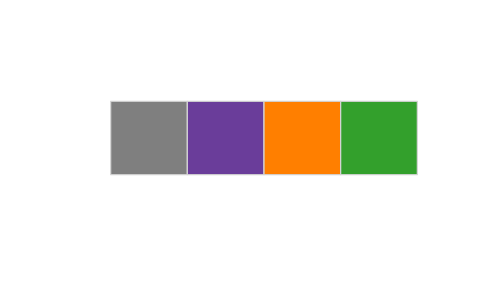

In [15]:
tmp = dat_ann %>% dplyr::select(Label, Color) %>% distinct
print(tmp)

options(repr.plot.height=2.5, repr.plot.width=4)
pal(tmp$Color)

In [16]:
start  = 48780000
end    = 48826000

dat_cov = dat_cov_astarr %>% dplyr::filter(Start >= start, End < end)
dat_lfc = dat_lfc_astarr %>% dplyr::filter(Start >= start, End < end)

In [17]:
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC))


lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR ChrX:48,780,000-48,826,000")

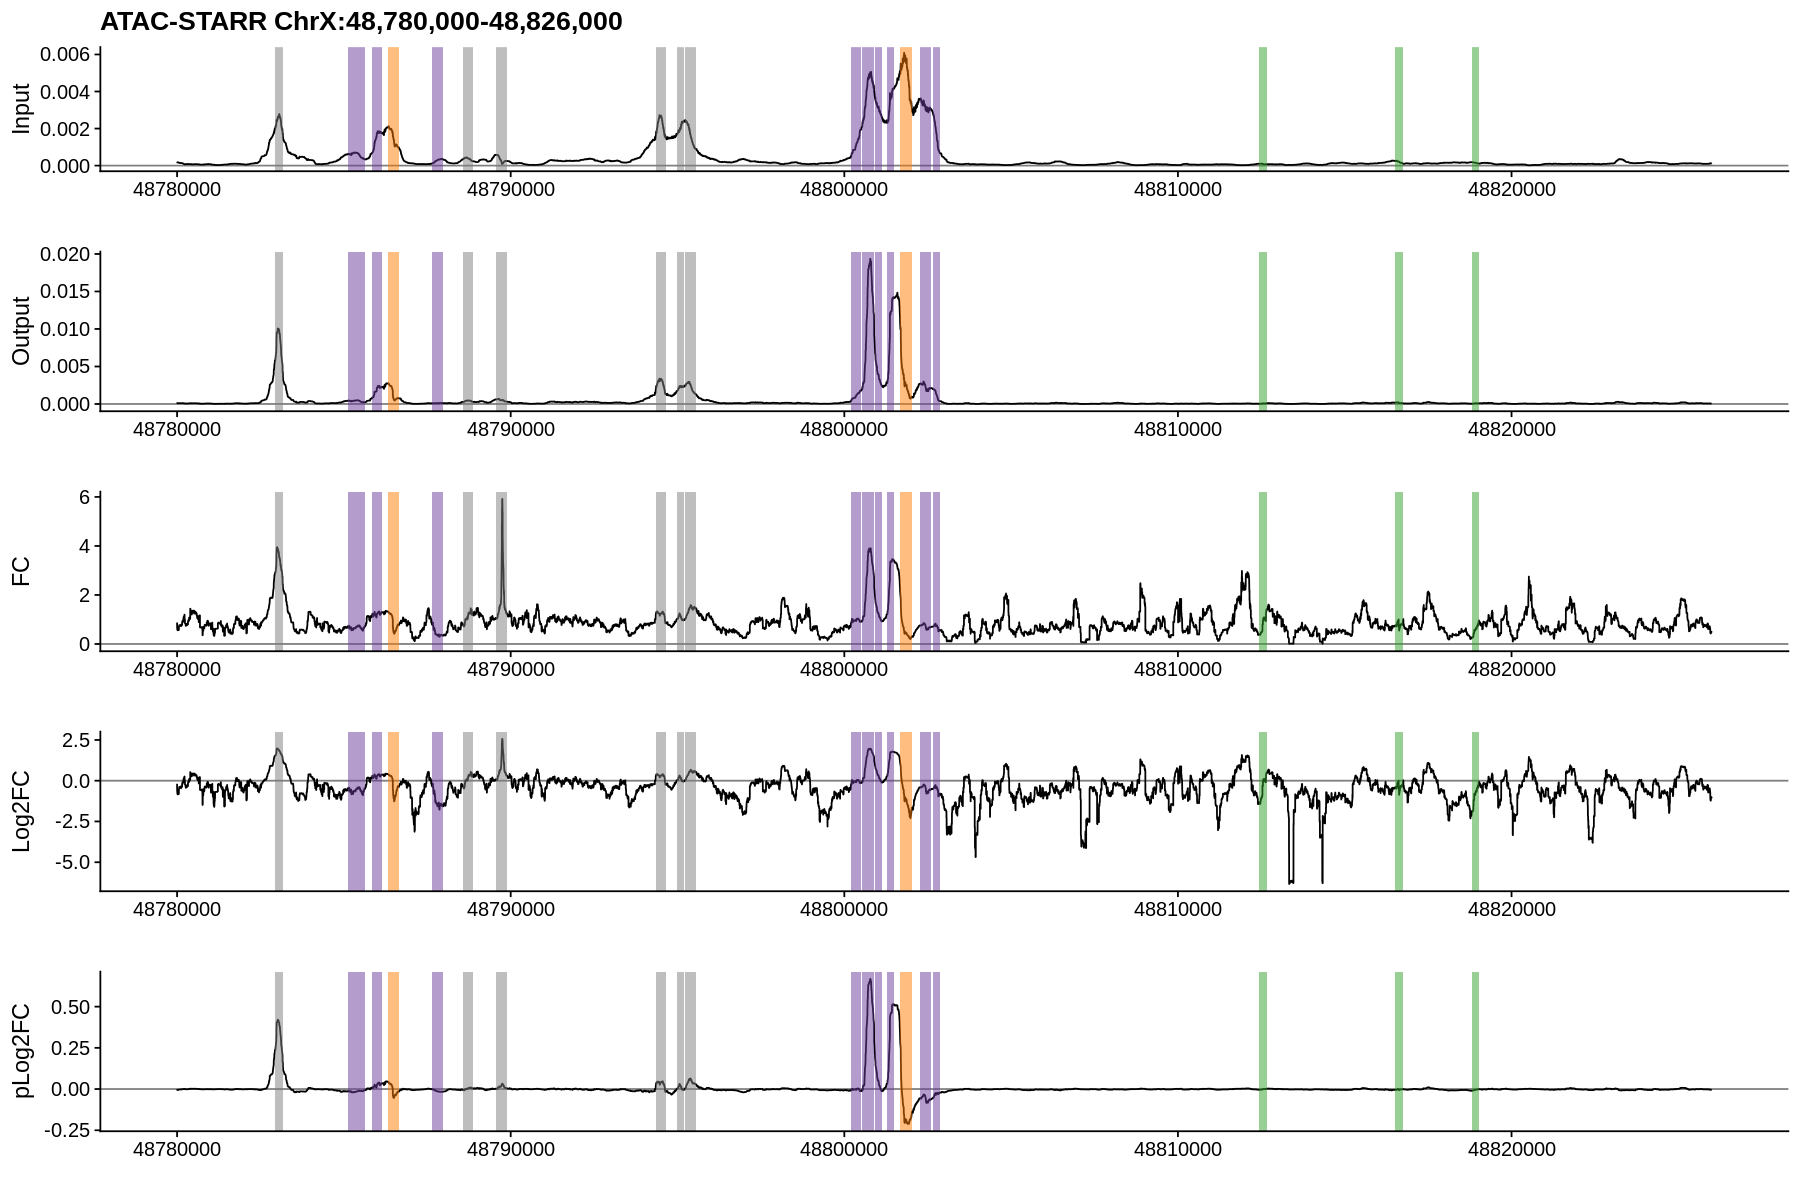

In [18]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [19]:
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input_R))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output_R))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_R))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC_R))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_R))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR ChrX:48,780,000-48,826,000")

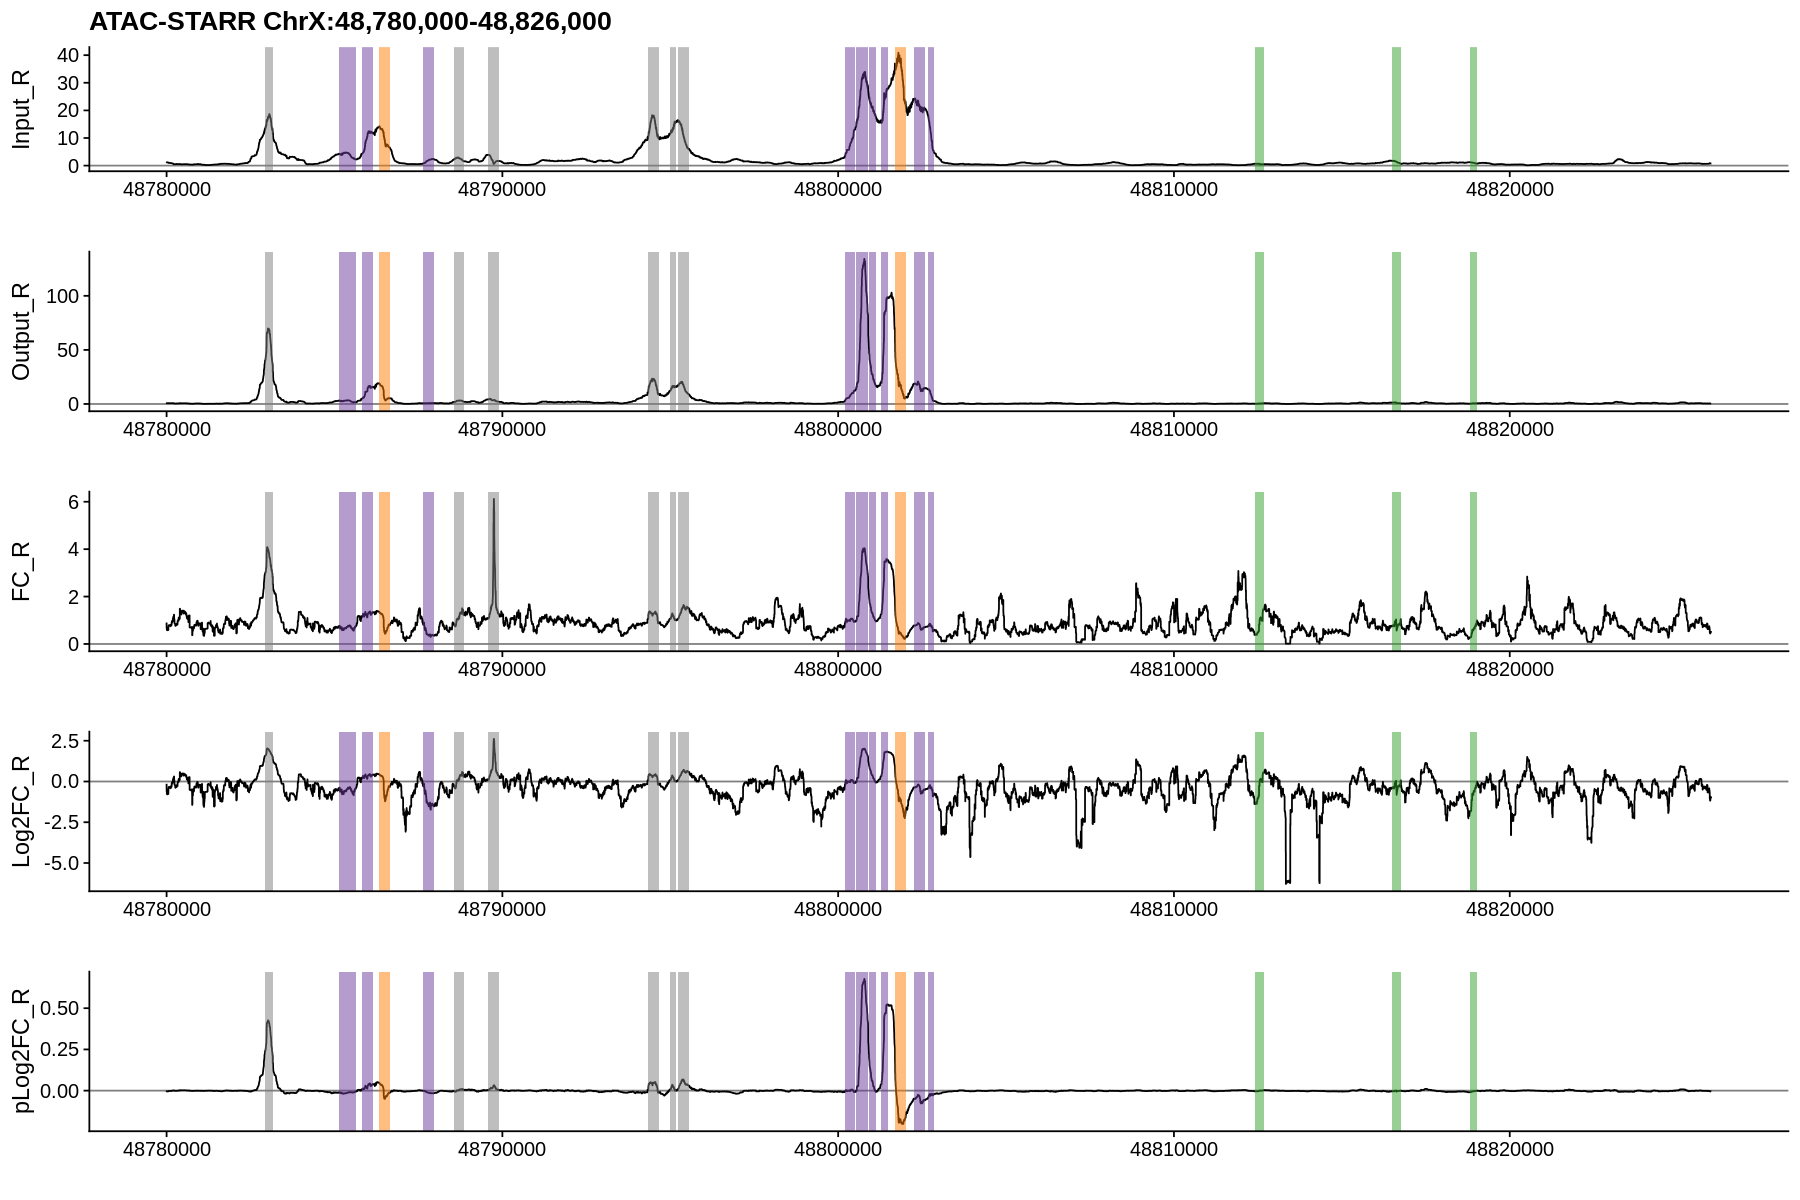

In [20]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Trackplot TMPRA

In [21]:
start  = 48780000
end    = 48826000

dat_cov = dat_cov_tmpra %>% dplyr::filter(Start >= start, End < end)
dat_lfc = dat_lfc_tmpra %>% dplyr::filter(Start >= start, End < end)

In [22]:
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC))


lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA ChrX:48,780,000-48,826,000")

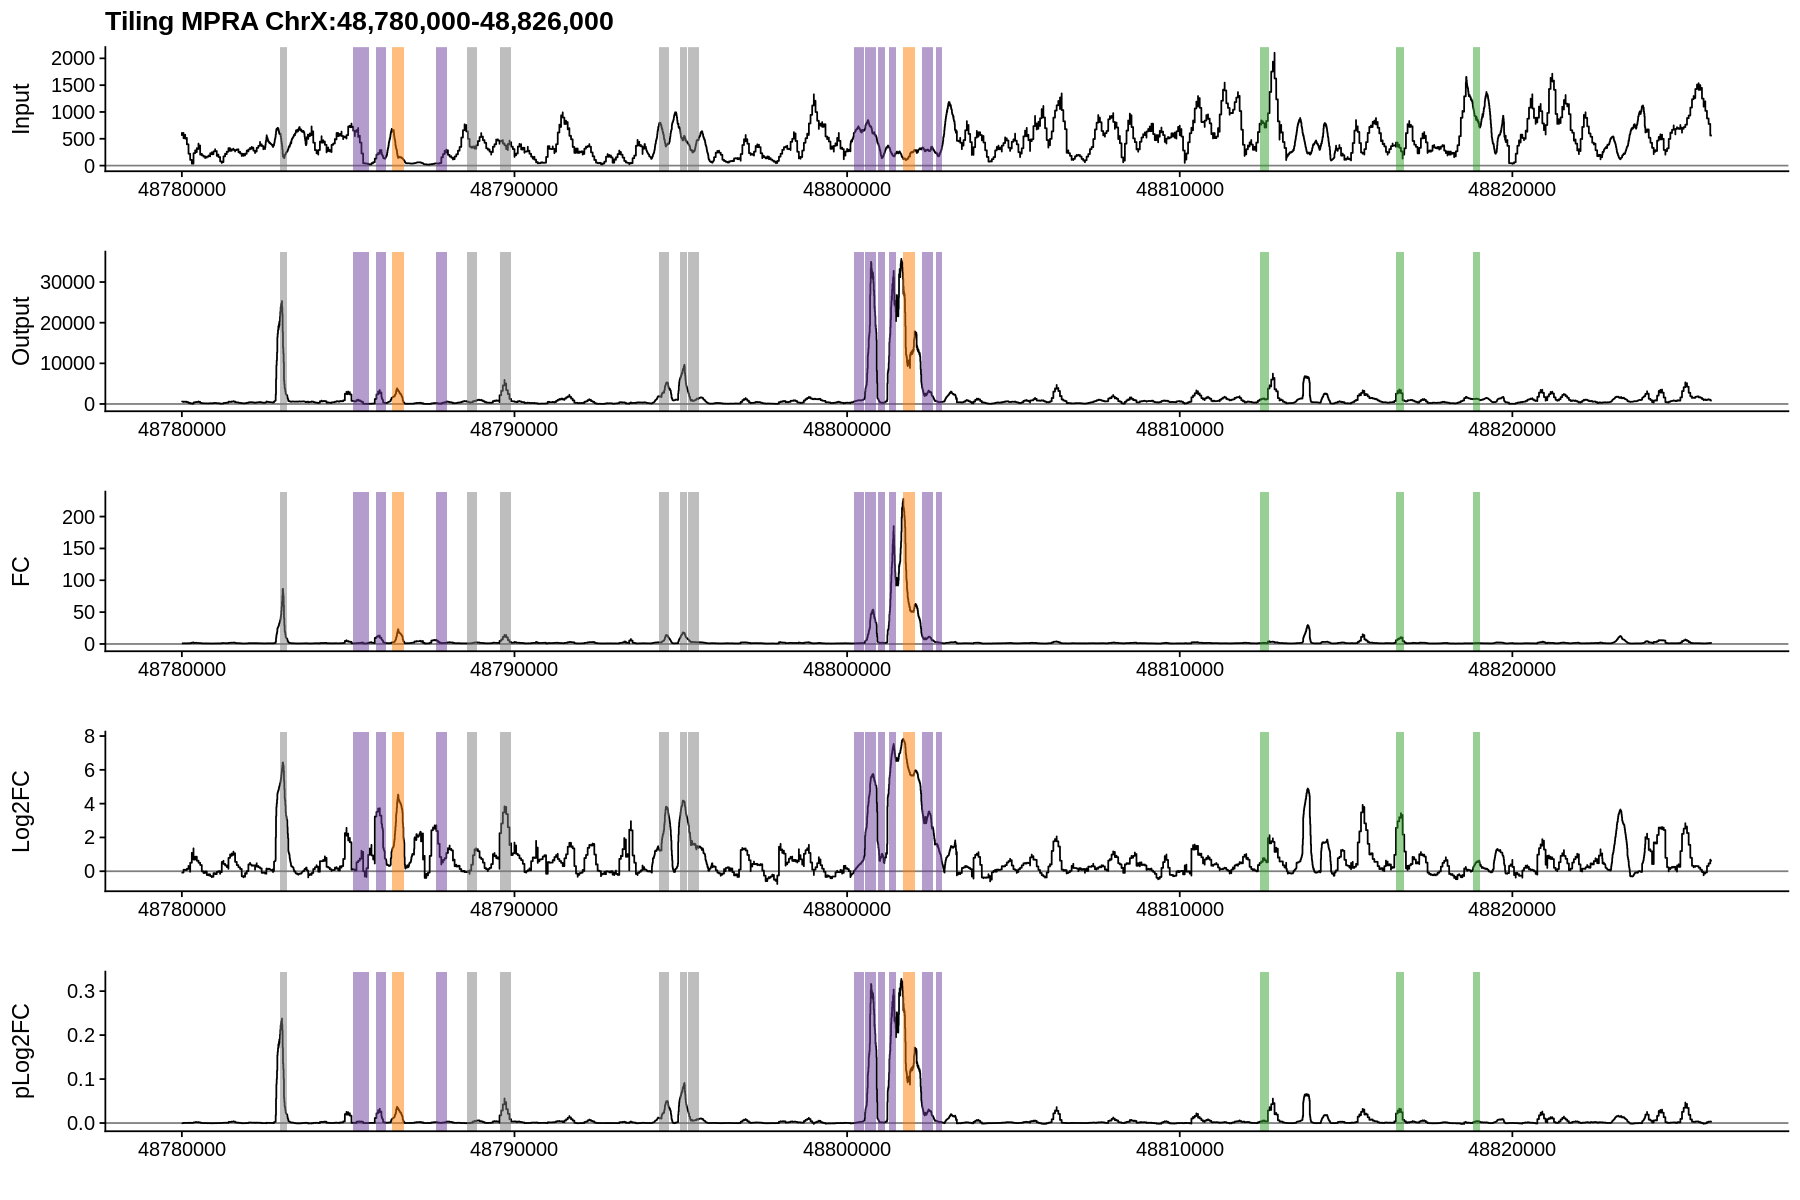

In [23]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [24]:
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input_R))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output_R))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_R))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC_R))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_R))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA ChrX:48,780,000-48,826,000")

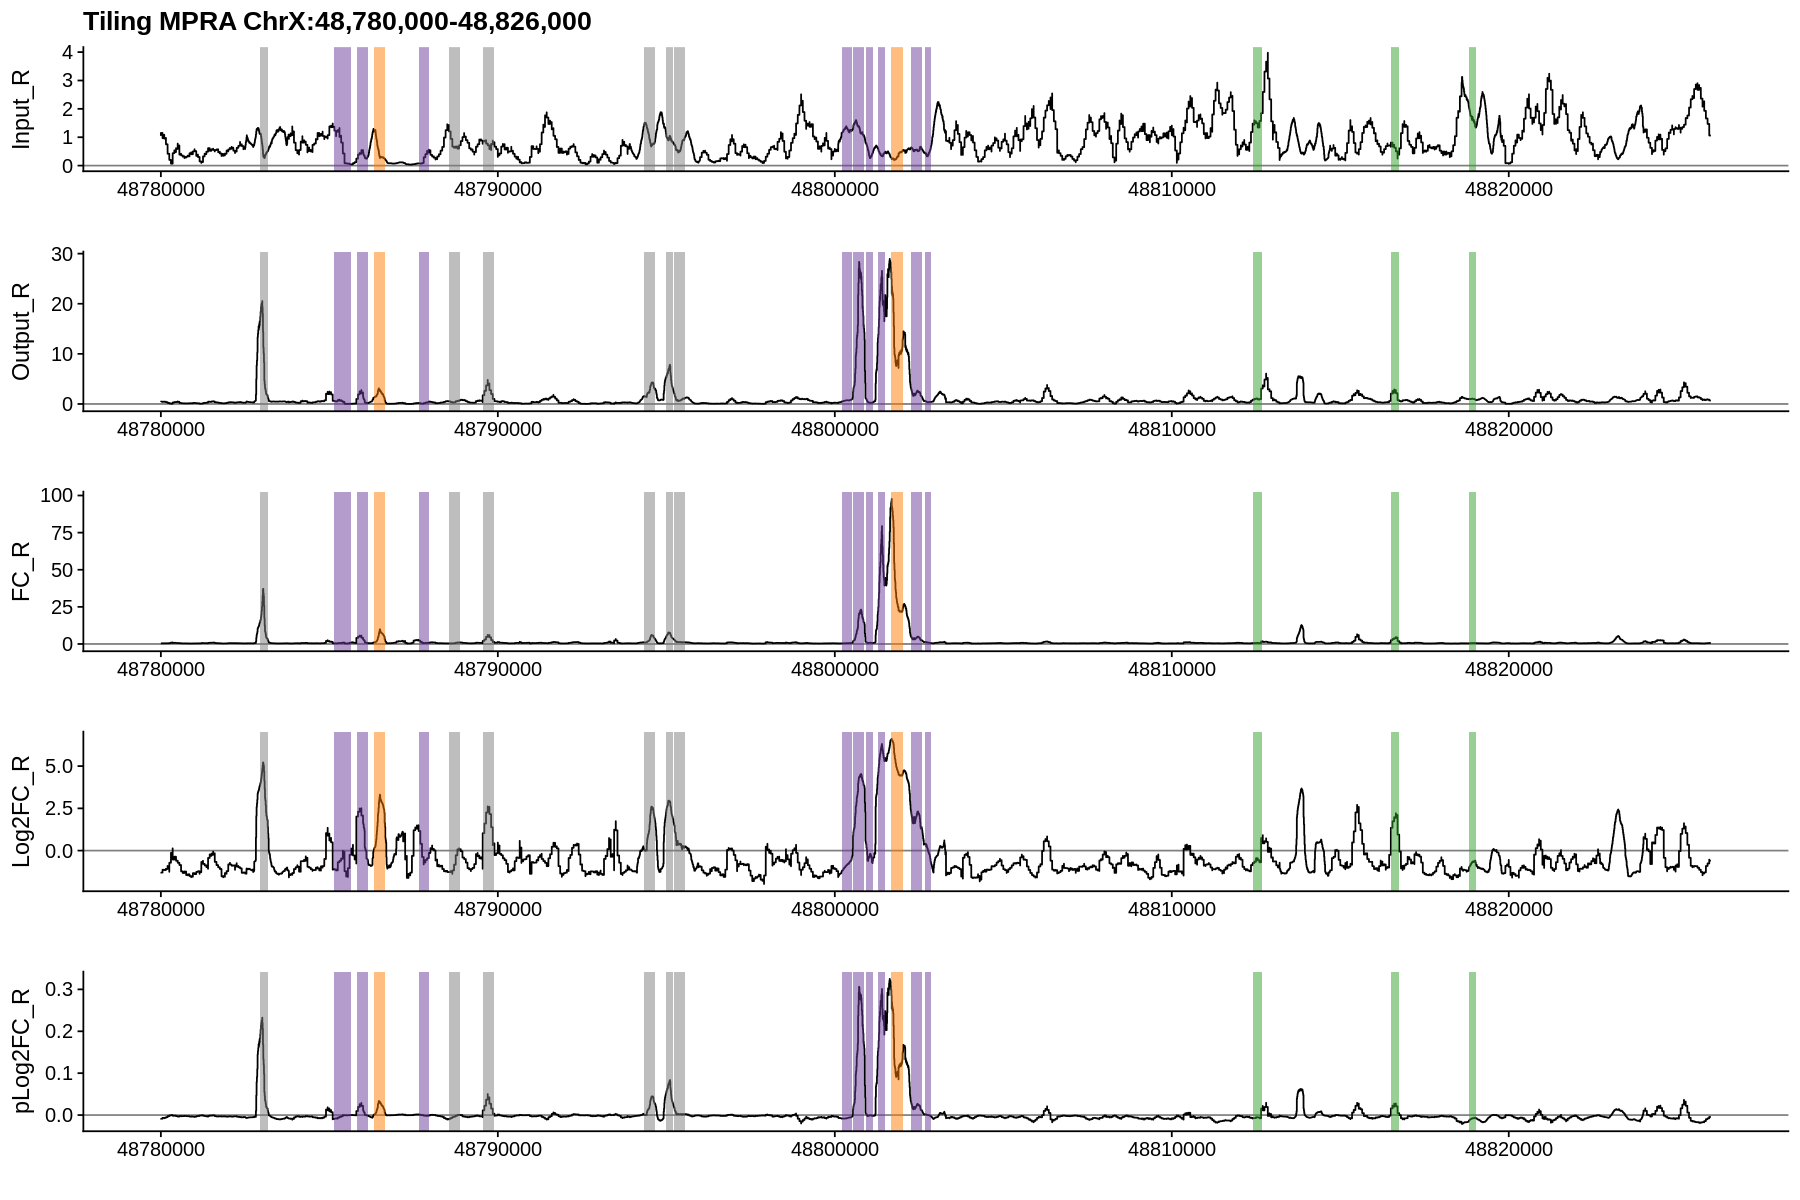

In [25]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Visualize ASTARR

In [18]:
start  = 48780000
end    = 48826000

dat = dat_tmpra_gata1
dat = dat %>%
    dplyr::filter(Start >= start, Start <= end) %>%
    mutate(
        FC        = Output / Input,
        Log2FC    = log2(Output / Input),
        pLog2FC   = log2((Output+1)  / (Input+1)),
        FC_R      = Output_R / Input_R,
        Log2FC_R  = log2(Output_R / Input_R),
        pLog2FC_R = log2((Output_R+1)  / (Input_R+1)))

### assign
dat_cov_tmpra = dat
print(dim(dat))
head(dat)

[1] 46000    13


Chrom,Start,End,Input,Output,Input_R,Output_R,FC,Log2FC,pLog2FC,FC_R,Log2FC_R,pLog2FC_R
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,2.068877e-05,1.971782e-05,1.047270,0.4282532,0.9530686,-0.06934805,-1.400761e-06,0.4089234,-1.290097,-0.5194495
chrX,48780001,48780002,2.274271e-05,2.154770e-05,1.151241,0.4679963,0.9474548,-0.07787091,-1.724011e-06,0.4065148,-1.298620,-0.5513205
chrX,48780002,48780003,2.274271e-05,2.154770e-05,1.151241,0.4679963,0.9474548,-0.07787091,-1.724011e-06,0.4065148,-1.298620,-0.5513205
chrX,48780003,48780004,2.274271e-05,2.154770e-05,1.151241,0.4679963,0.9474548,-0.07787091,-1.724011e-06,0.4065148,-1.298620,-0.5513205
chrX,48780004,48780005,2.274271e-05,2.154770e-05,1.151241,0.4679963,0.9474548,-0.07787091,-1.724011e-06,0.4065148,-1.298620,-0.5513205
chrX,48780005,48780006,2.274271e-05,2.154770e-05,1.151241,0.4679963,0.9474548,-0.07787091,-1.724011e-06,0.4065148,-1.298620,-0.5513205


## visualize ASTARR

In [7]:
start  = 48780000
end    = 48826000

dat = dat_astarr_gata1
dat = dat %>%
    dplyr::filter(Start >= start, End < end) %>%
    dplyr::filter(Strand == "unstranded")

### assign
dat_cov_astarr = dat
print(dim(dat))
head(dat)

[1] 45999     7


Chrom,Start,End,Strand,Region,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,48780000,48780001,unstranded,GATA1,0.0001916078,0.0001677807
chrX,48780001,48780002,unstranded,GATA1,0.0001797762,0.0001209439
chrX,48780002,48780003,unstranded,GATA1,0.0001809119,0.0001250035
chrX,48780003,48780004,unstranded,GATA1,0.0001768448,0.0001116722
chrX,48780004,48780005,unstranded,GATA1,0.0001768448,0.0001116722
chrX,48780005,48780006,unstranded,GATA1,0.0001768448,0.0001113339


In [34]:
dat = dat_cov_astarr
dat = dat %>% 
    dplyr::filter(Input  != 0) %>% 
    dplyr::filter(Output != 0) %>% 
    mutate(
        FC     = Output / Input,
        Log2FC = log2(Output / Input),
        pLog2FC_add01 = log2((Output+ 1)  / (Input+ 1)),
        pLog2FC_add10 = log2((Output+10)  / (Input+10)),
        
        pLog2FC_10neg1 = log2((Output+10^-1)   / (Input+10^-1)),
        pLog2FC_10neg2 = log2((Output+10^-2)   / (Input+10^-2)),
        pLog2FC_10neg3 = log2((Output+10^-3)   / (Input+10^-3)),
        pLog2FC_10neg4 = log2((Output+10^-4)   / (Input+10^-4)),
        pLog2FC_10neg5 = log2((Output+10^-5)   / (Input+10^-5))
    )

### standardize
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### signal to mean ratio
dat$Input_Ratio  = dat$Input  / mean(dat$Input)
dat$Output_Ratio = dat$Output / mean(dat$Output)

### ratio
dat = dat %>% 
    mutate(
        FC_R     = Output_Ratio / Input_Ratio,
        Log2FC_R = log2(Output_Ratio / Input_Ratio),
        pLog2FC_R = log2((Output_Ratio+1) / (Input_Ratio+1))
    )

### assign
dat_lfc_astarr = dat
print(dim(dat))
head(dat)

[1] 45990    22


Chrom,Start,End,Strand,Region,Input,Output,FC,Log2FC,pLog2FC_add01,⋯,pLog2FC_10neg2,pLog2FC_10neg3,pLog2FC_10neg4,pLog2FC_10neg5,FC_Z,Input_Ratio,Output_Ratio,FC_R,Log2FC_R,pLog2FC_R
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,unstranded,GATA1,0.0001916078,0.0001677807,0.8756464,-0.1915797,-3.436909e-05,⋯,-0.003376848,-0.02914012,-0.1229774,-0.1814529,0.01638141,0.4399041,0.3017186,0.6858737,-0.5439852,-0.1455551
chrX,48780001,48780002,unstranded,GATA1,0.0001797762,0.0001209439,0.6727471,-0.5718639,-8.486431e-05,⋯,-0.008362000,-0.07379914,-0.3405931,-0.5353501,-0.36409082,0.4127406,0.2174925,0.5269473,-0.9242694,-0.2145836
chrX,48780002,48780003,unstranded,GATA1,0.0001809119,0.0001250035,0.6909634,-0.5333188,-8.064641e-05,⋯,-0.007944380,-0.06997183,-0.3201702,-0.4999102,-0.32993191,0.4153478,0.2247928,0.5412158,-0.8857243,-0.2086189
chrX,48780003,48780004,unstranded,GATA1,0.0001768448,0.0001116722,0.6314703,-0.6632132,-9.401056e-05,⋯,-0.009268735,-0.08219257,-0.3872453,-0.6188404,-0.44149207,0.4060104,0.2008193,0.4946162,-1.0156187,-0.2275882
chrX,48780004,48780005,unstranded,GATA1,0.0001768448,0.0001116722,0.6314703,-0.6632132,-9.401056e-05,⋯,-0.009268735,-0.08219257,-0.3872453,-0.6188404,-0.44149207,0.4060104,0.2008193,0.4946162,-1.0156187,-0.2275882
chrX,48780005,48780006,unstranded,GATA1,0.0001768448,0.0001113339,0.6295573,-0.6675903,-9.449856e-05,⋯,-0.009317002,-0.08263167,-0.3895529,-0.6228572,-0.44507918,0.4060104,0.2002109,0.4931178,-1.0199958,-0.2283192


In [35]:
mycolors = c(
    "#8dd3c7", #01
    "#ffffb3", #02
    "#bebada", #03
    "#fb8072", #04
    "#80b1d3", #05
    "#fdb462", #06
    "#b3de69", #07
    "#fccde5", #08
    "#d9d9d9", #09
    "#bc80bd", #10
    "#ccebc5", #11
    "#ffed6f", #12
    "#1f78b4",
    "#b2df8a",
    "#33a02c",
    "#fb9a99",
    "#e31a1c",
    "#ff7f00",
    "#cab2d6",
    "#6a3d9a",
    "#b15928")

In [36]:
### get ccre at around GATA1 gene
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= start, End < end)

### add color
#dat_ann$Color = tol21rainbow
dat_ann$Color = mycolors

### show table
print(dim(dat_ann))
head(dat_ann)

[1] 21  6


Chrom,Start,End,Name,Label,Color
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,48782936,48783167,EH38E2754140,dELS,#8dd3c7
chrX,48785136,48785352,EH38E2754144,pELS,#ffffb3
chrX,48785356,48785641,EH38E2754145,pELS,#bebada
chrX,48785832,48786141,EH38E2754146,pELS,#fb8072
chrX,48786328,48786666,EH38E2754147,PLS,#80b1d3
chrX,48787650,48787962,EH38E2754149,pELS,#fdb462


In [37]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_add01))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="ATAC-STARR ChrX:48,780,000-48,826,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=1.0)")

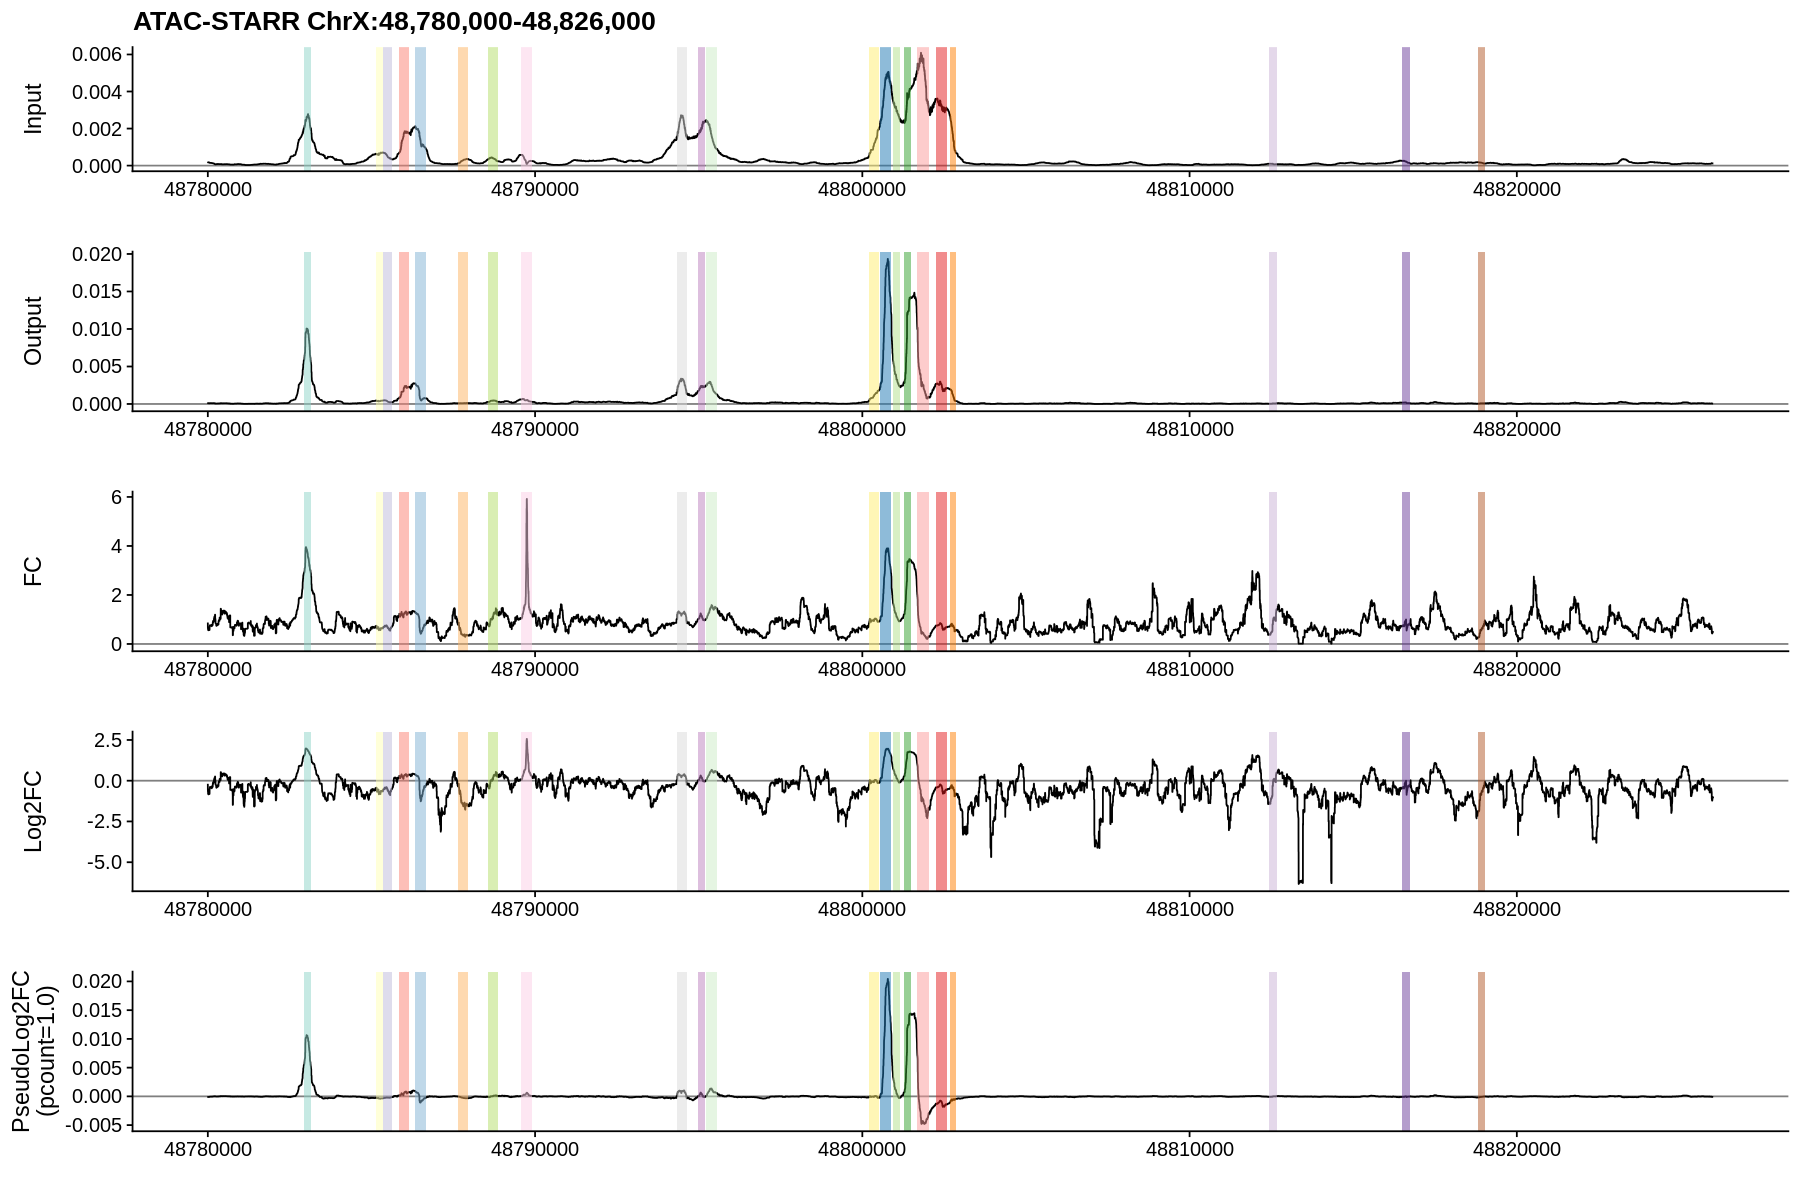

In [38]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [39]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Input_Ratio))
gp2 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Output_Ratio))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_R))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=Log2FC_R))
gp5 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=pLog2FC_R))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

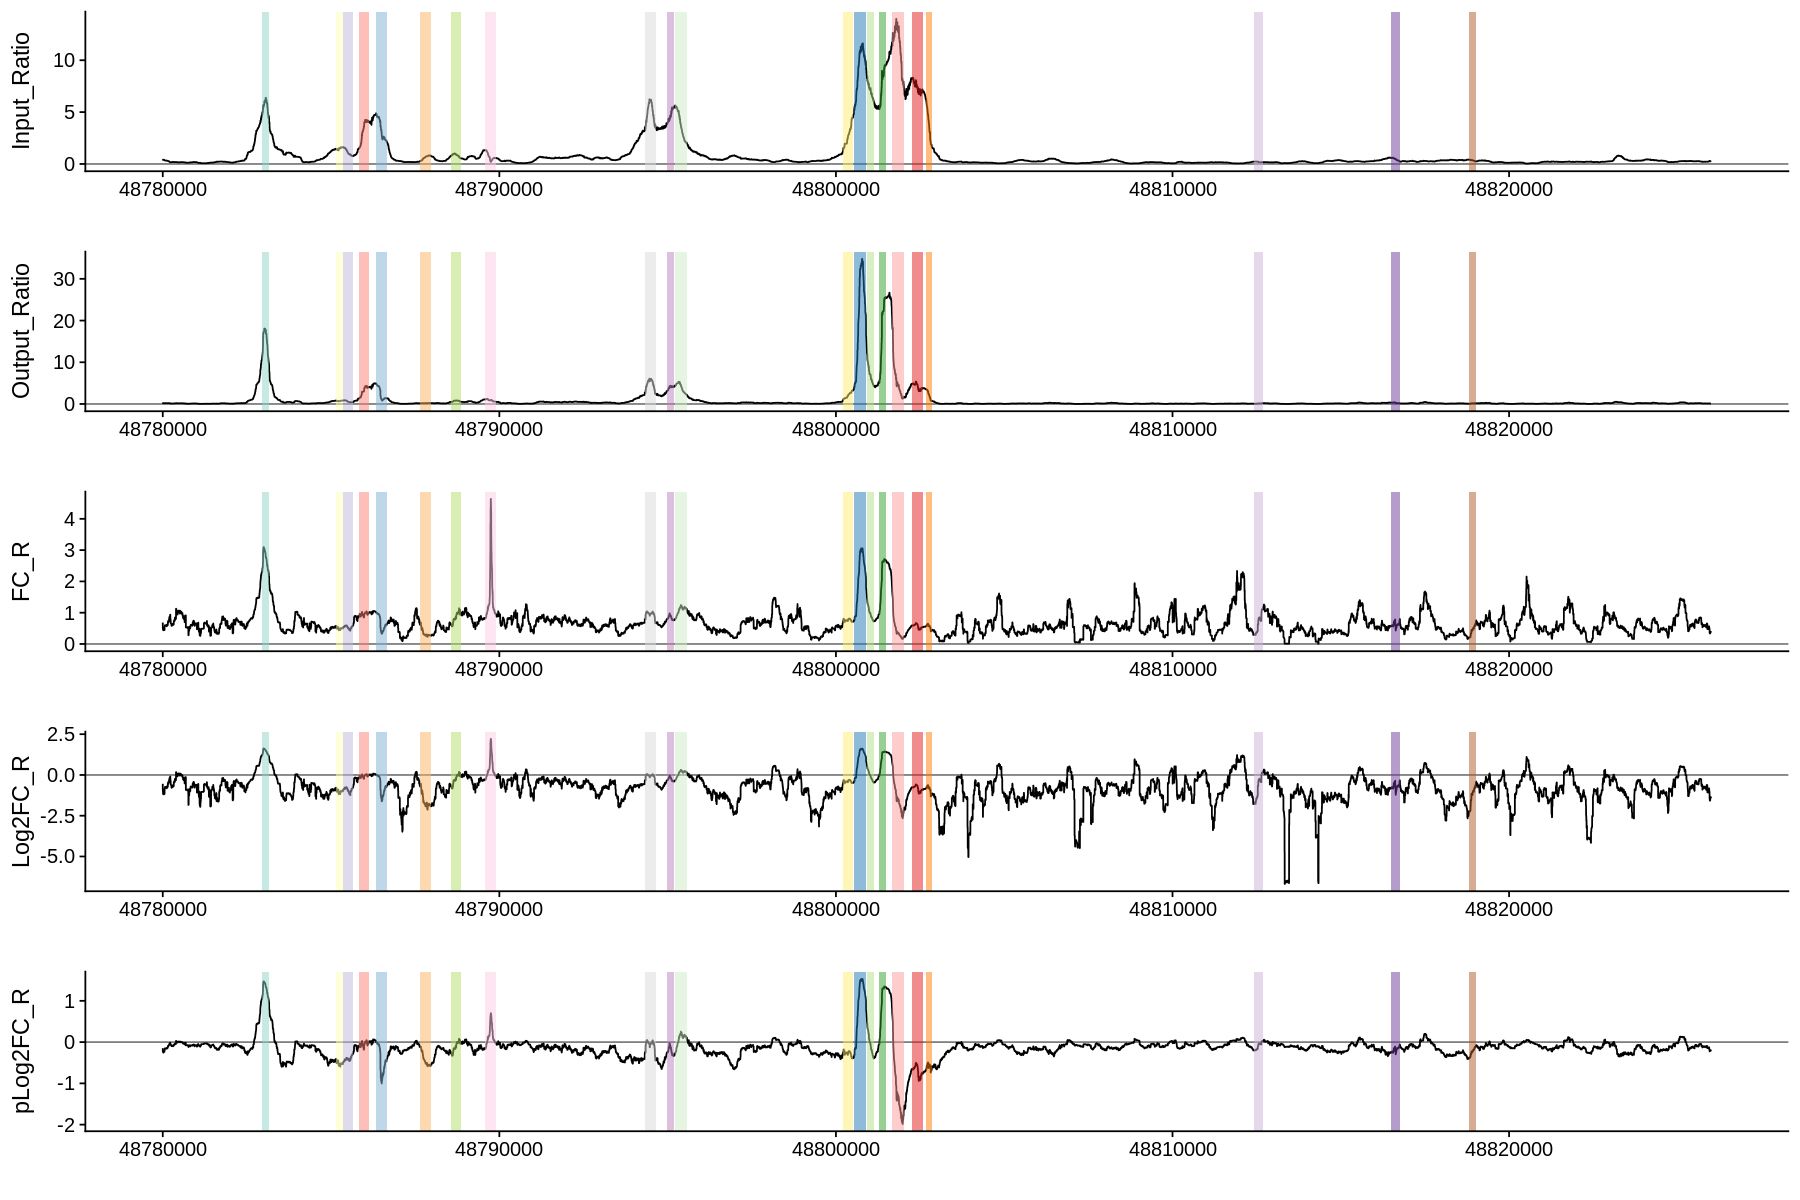

In [40]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [15]:
dat_cov = dat_cov_astarr
dat_lfc = dat_lfc_astarr
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_lfc, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

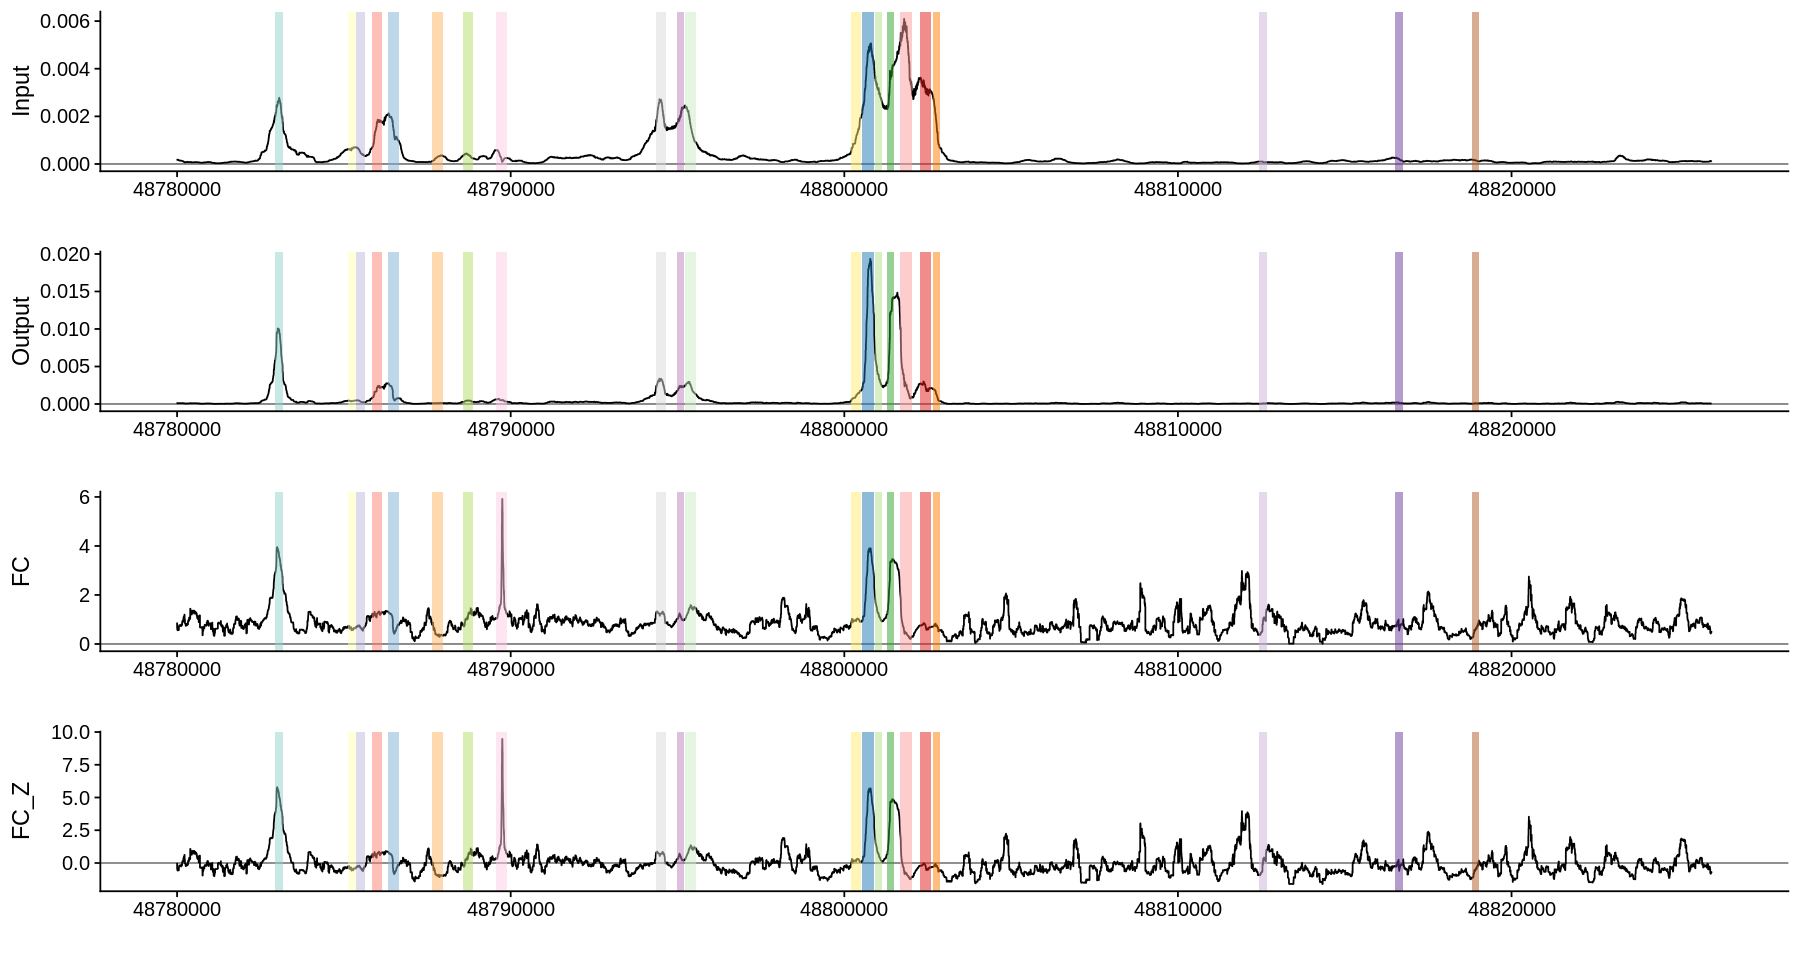

In [16]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [17]:
dat_lfc = dat_lfc_astarr
gp1 = ggplot(dat_lfc, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg5))
gp3 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg4))
gp4 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg3))
gp5 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg2))
gp6 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_10neg1))
gp7 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add01))
gp8 = ggplot(dat_lfc, aes(x=Start, y=pLog2FC_add10))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC (10^-5)")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC (10^-4)")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC (10^-3)")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC (10^-2)")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC (10^-1)")
lst[[7]] = lst[[7]] + labs(x="", y="", title="pseudoLog2FC (10^+0 =  1)")
lst[[8]] = lst[[8]] + labs(x="", y="", title="pseudoLog2FC (10^+1 = 10)")

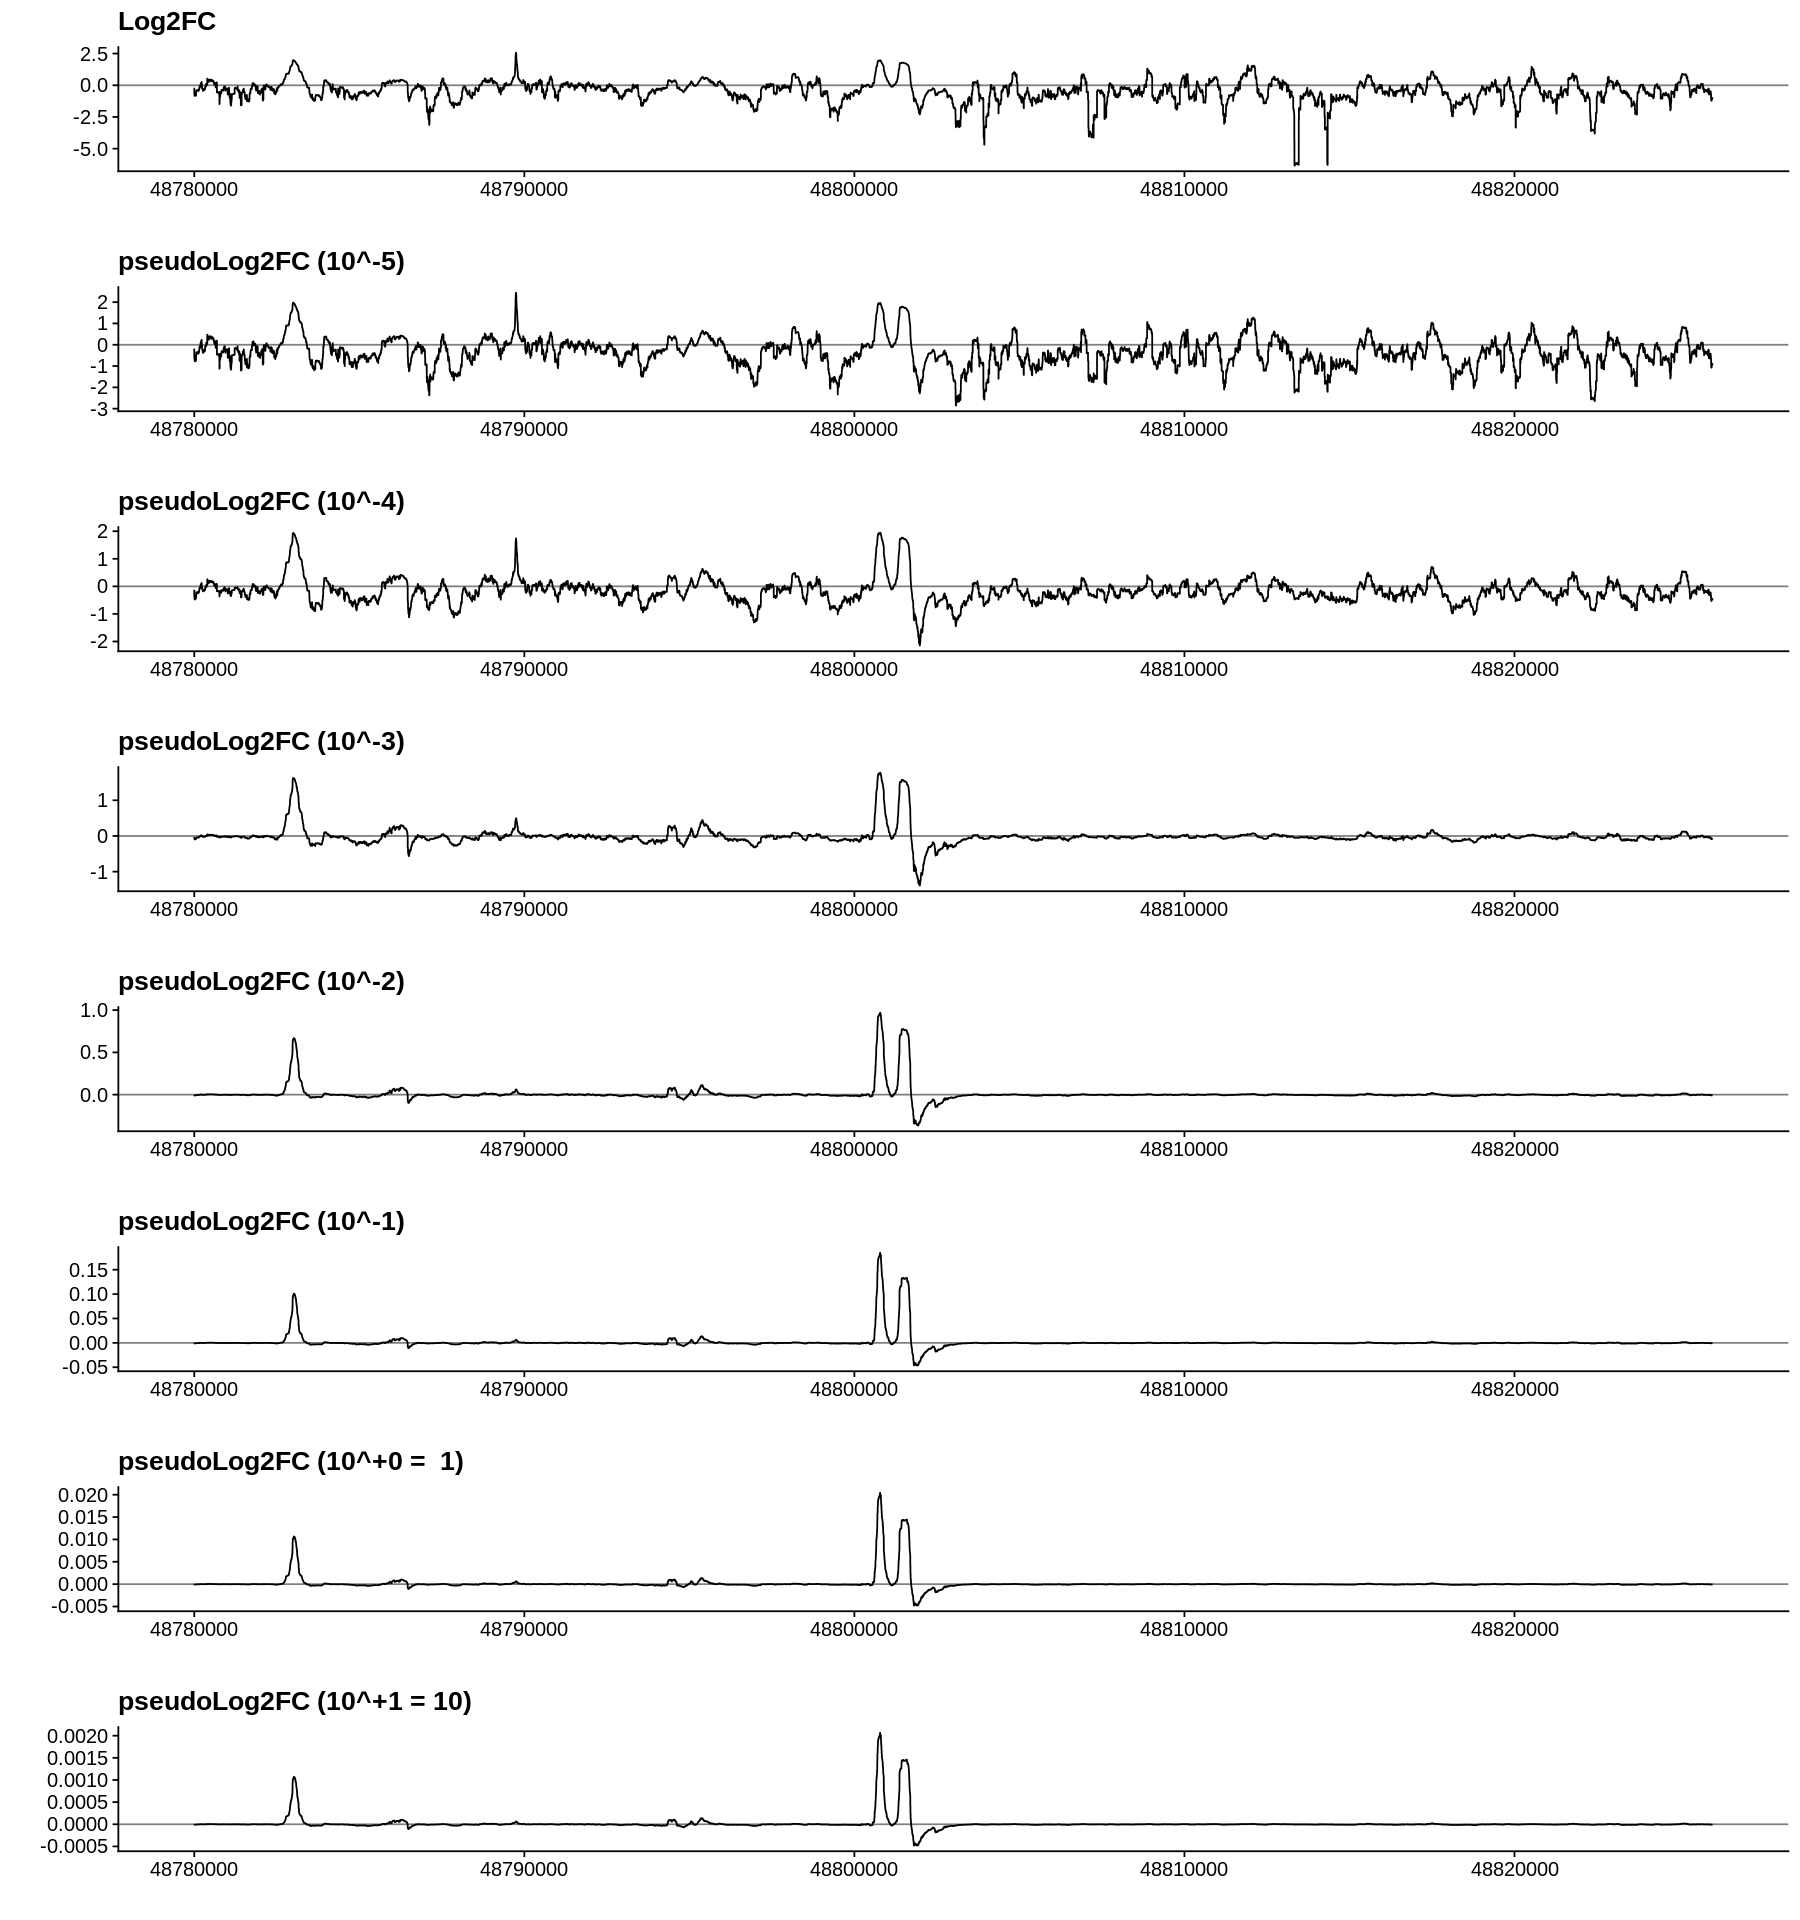

In [18]:
options(repr.plot.height=16, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

## Plot TMPRA

In [19]:
dat = dat_tmpra_gata1
head(dat)

Chrom,Start,End,Input,Output,FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786402,2117,10474,4.947567
chrX,47786402,47786403,2117,10474,4.947567
chrX,47786403,47786404,2117,10474,4.947567
chrX,47786404,47786405,2117,10474,4.947567
chrX,47786405,47786406,2117,10474,4.947567
chrX,47786406,47786407,2117,10474,4.947567


In [25]:
start  = 48780000
end    = 48826000

dat = dat_tmpra_gata1
dat = dat %>%
    dplyr::filter(Start >= start, Start <= end) %>%
    mutate(
        Log2FC = log2(FC),
        pLog2FC_1e2 = log2((Output+  10^+2) / (Input+  10^+2)),
        pLog2FC_5e2 = log2((Output+5*10^+2) / (Input+5*10^+2)),
        pLog2FC_1e3 = log2((Output+  10^+3) / (Input+  10^+3)),
        pLog2FC_1e4 = log2((Output+  10^+4) / (Input+  10^+4)),
        pLog2FC_1e5 = log2((Output+  10^+5) / (Input+  10^+5))
    )

### standardize
dat$FC_Z = (dat$FC - mean(dat$FC)) / sd(dat$FC)

### signal to mean ratio
dat$Input_Ratio  = dat$Input  / cnt_inp #* 1000
dat$Output_Ratio = dat$Output / cnt_out #* 1000

### ratio
dat = dat %>% 
    mutate(
        FC_R     = Output_Ratio / Input_Ratio,
        Log2FC_R = log2(Output_Ratio / Input_Ratio),
        pLog2FC_R = log2((Output_Ratio+1) / (Input_Ratio+1))
    )

### show table
dat_cov_tmpra = dat
print(dim(dat))
head(dat)

[1] 46000    18


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC_1e2,pLog2FC_5e2,pLog2FC_1e3,pLog2FC_1e4,pLog2FC_1e5,FC_Z,Input_Ratio,Output_Ratio,FC_R,Log2FC_R,pLog2FC_R
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,48780000,48780001,554,528,0.9530686,-0.06934805,-0.05852608,-0.03603460,-0.02434196,-0.003558494,-0.0003730823,-0.2203534,2.068877e-05,5.774415e-06,0.2791086,-1.841102,-2.151659e-05
chrX,48780001,48780002,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899,2.274271e-05,6.310298e-06,0.2774646,-1.849624,-2.370662e-05
chrX,48780002,48780003,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899,2.274271e-05,6.310298e-06,0.2774646,-1.849624,-2.370662e-05
chrX,48780003,48780004,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899,2.274271e-05,6.310298e-06,0.2774646,-1.849624,-2.370662e-05
chrX,48780004,48780005,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899,2.274271e-05,6.310298e-06,0.2774646,-1.849624,-2.370662e-05
chrX,48780005,48780006,609,577,0.9474548,-0.07787091,-0.06662979,-0.04224112,-0.02898167,-0.004358187,-0.0004589409,-0.2206899,2.274271e-05,6.310298e-06,0.2774646,-1.849624,-2.370662e-05


In [26]:
dat = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat, aes(x=Start, y=Log2FC))
gp5 = ggplot() + geom_line(data=dat, aes(x=Start, y=pLog2FC_1e4))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot() 
    return(gpt)
})

lst[[1]] = lst[[1]] + labs(title="Tiling MPRA ChrX:48,780,000-48,826,000")
lst[[5]] = lst[[5]] + labs(y = "PseudoLog2FC\n(pcount=10,000)")

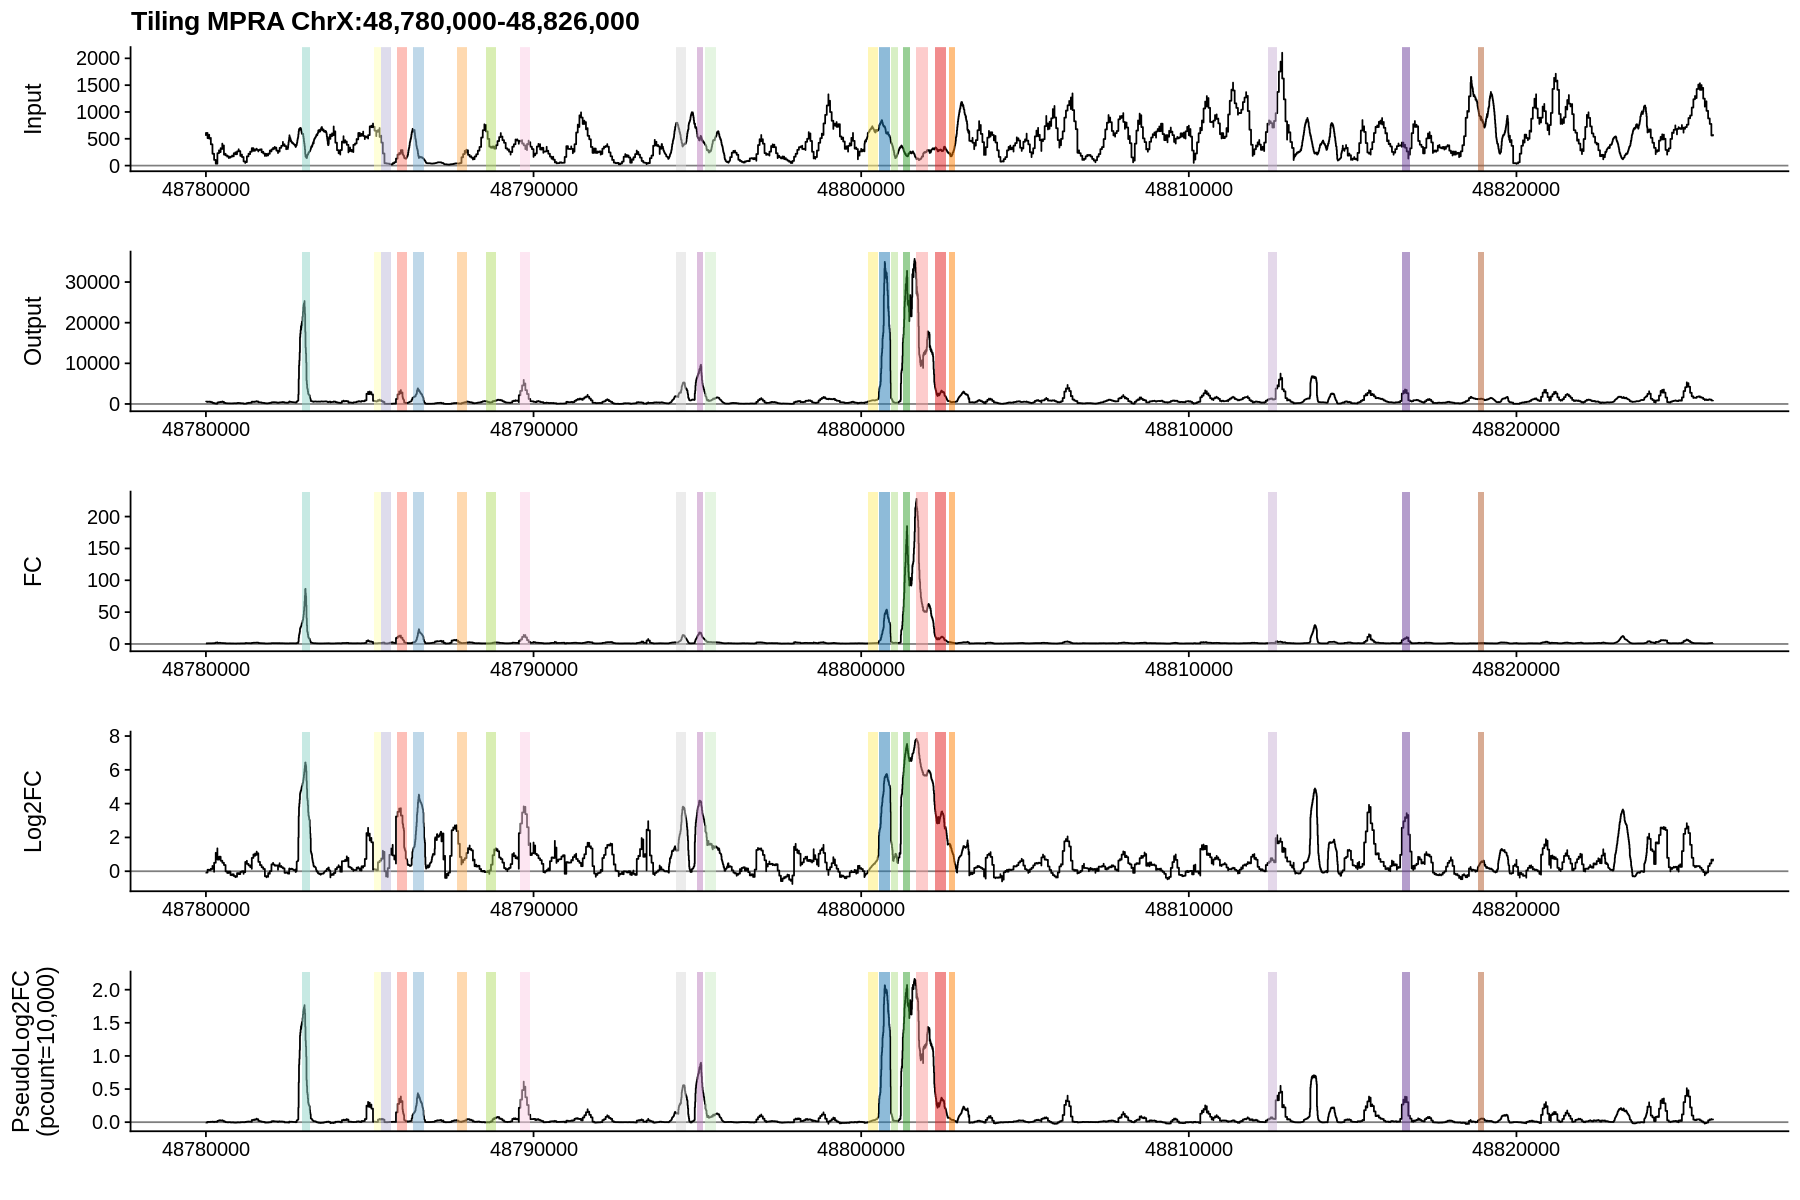

In [27]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [28]:
dat_cov = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input_Ratio))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output_Ratio))
gp3 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC_R))
gp4 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Log2FC_R))
gp5 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=pLog2FC_R))

lst = list(gp1, gp2, gp3, gp4, gp5)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

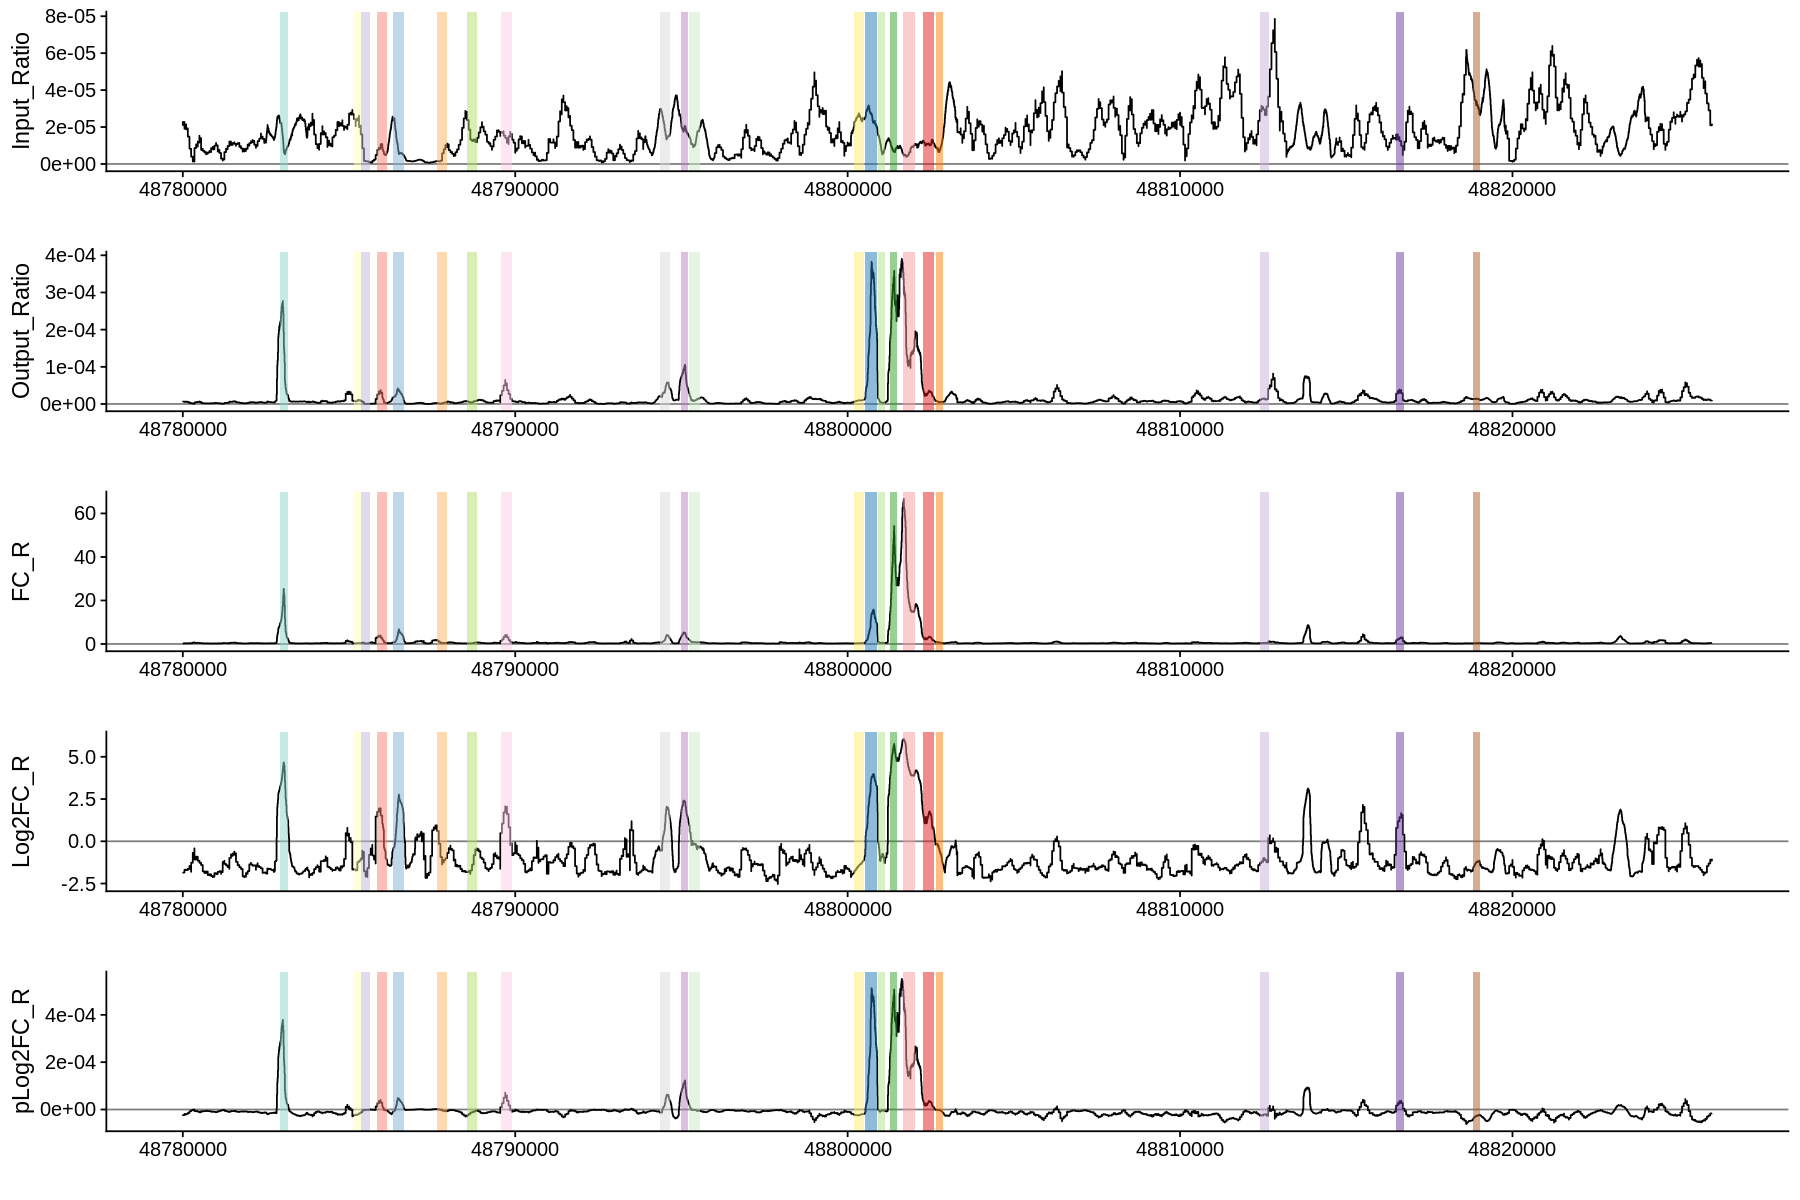

In [29]:
options(repr.plot.height=10, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [30]:
dat_cov = dat_cov_tmpra
gp1 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Input))
gp2 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=Output))
gp3 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC))
gp4 = ggplot() + geom_line(data=dat_cov, aes(x=Start, y=FC_Z))

lst = list(gp1, gp2, gp3, gp4)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        geom_rect(
            data = dat_ann,
            aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
            fill = dat_ann$Color,
            alpha=0.5) +
        labs(x="") +
        theme_cowplot()
    return(gpt)
})

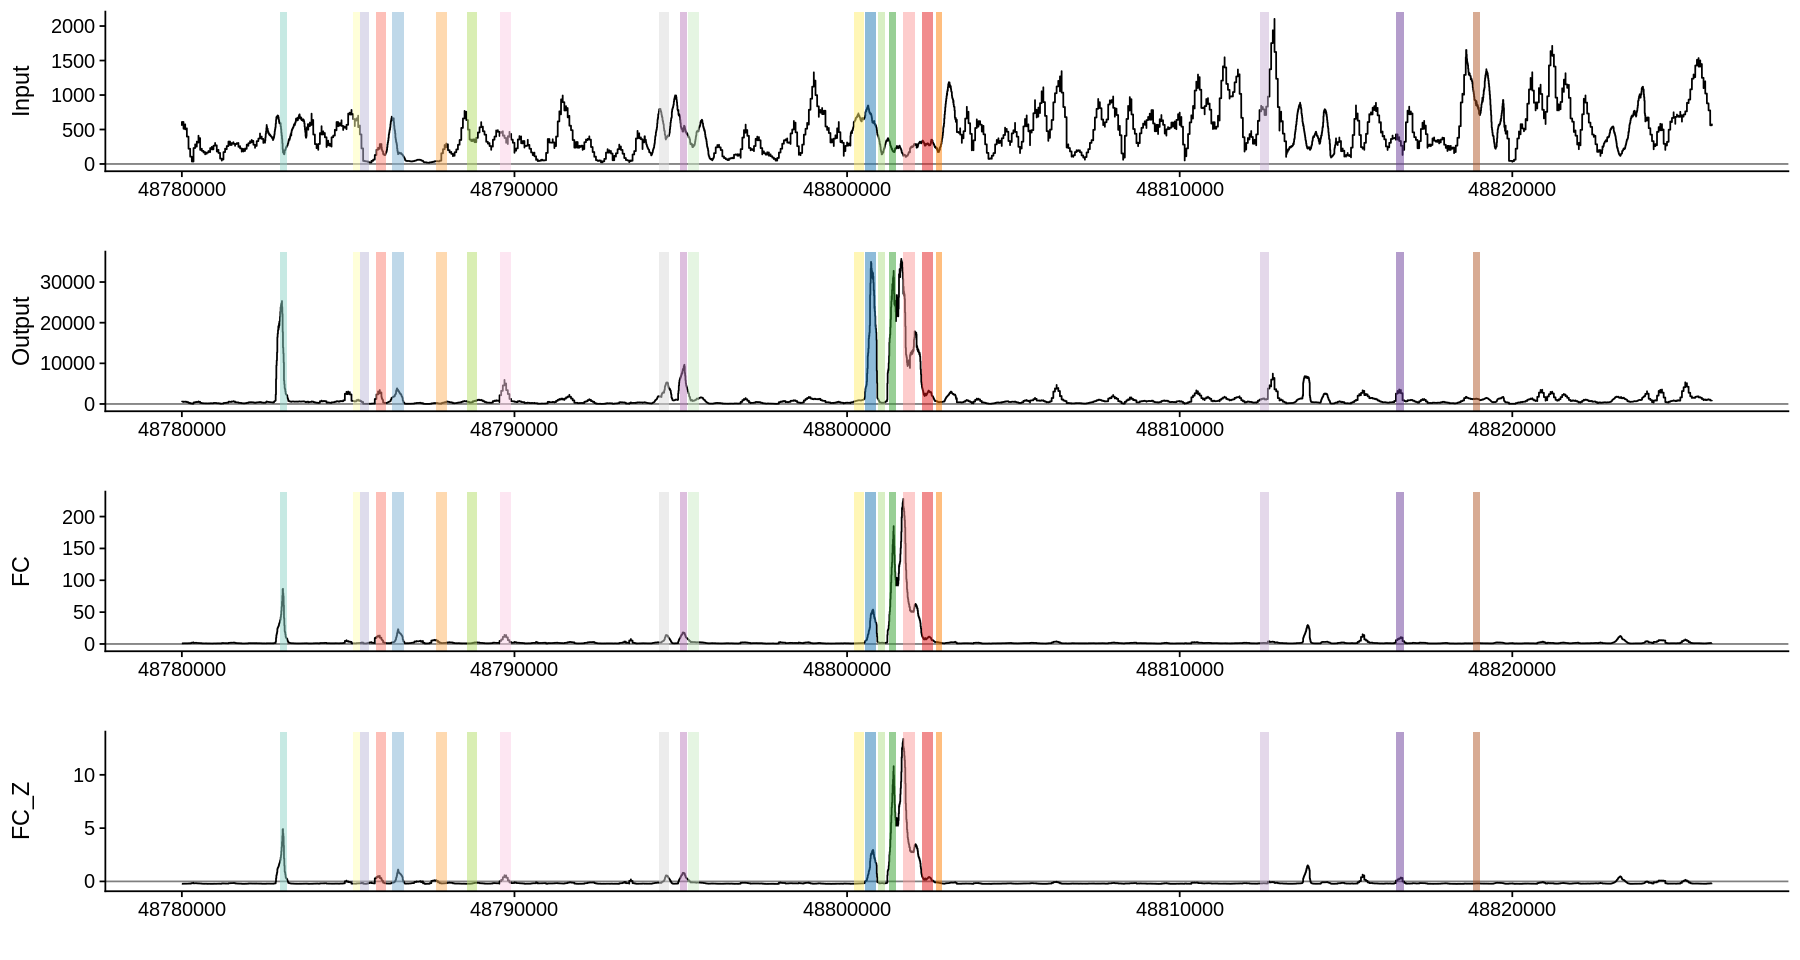

In [31]:
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [32]:
dat = dat_cov_tmpra
gp1 = ggplot(dat, aes(x=Start, y=Log2FC))
gp2 = ggplot(dat, aes(x=Start, y=pLog2FC_1e2))
gp3 = ggplot(dat, aes(x=Start, y=pLog2FC_5e2))
gp4 = ggplot(dat, aes(x=Start, y=pLog2FC_1e3))
gp5 = ggplot(dat, aes(x=Start, y=pLog2FC_1e4))
gp6 = ggplot(dat, aes(x=Start, y=pLog2FC_1e5))

lst = list(gp1, gp2, gp3, gp4, gp5, gp6)
lst = lapply(lst, function(gpt){
    gpt = gpt + 
        geom_hline(yintercept = 0, alpha=0.5) + 
        geom_line() + 
        theme_cowplot()
    return(gpt)
})

txt = "pLog2FC = log2( (Output + cnt) / (Input + cnt) )"
lst[[1]] = lst[[1]] + labs(x="", y="", title="Log2FC")
lst[[2]] = lst[[2]] + labs(x="", y="", title="pseudoLog2FC:     100")
lst[[3]] = lst[[3]] + labs(x="", y="", title="pseudoLog2FC:     500")
lst[[4]] = lst[[4]] + labs(x="", y="", title="pseudoLog2FC:   1,000")
lst[[5]] = lst[[5]] + labs(x="", y="", title="pseudoLog2FC:  10,000")
lst[[6]] = lst[[6]] + labs(x="", y="", title="pseudoLog2FC: 100,000")

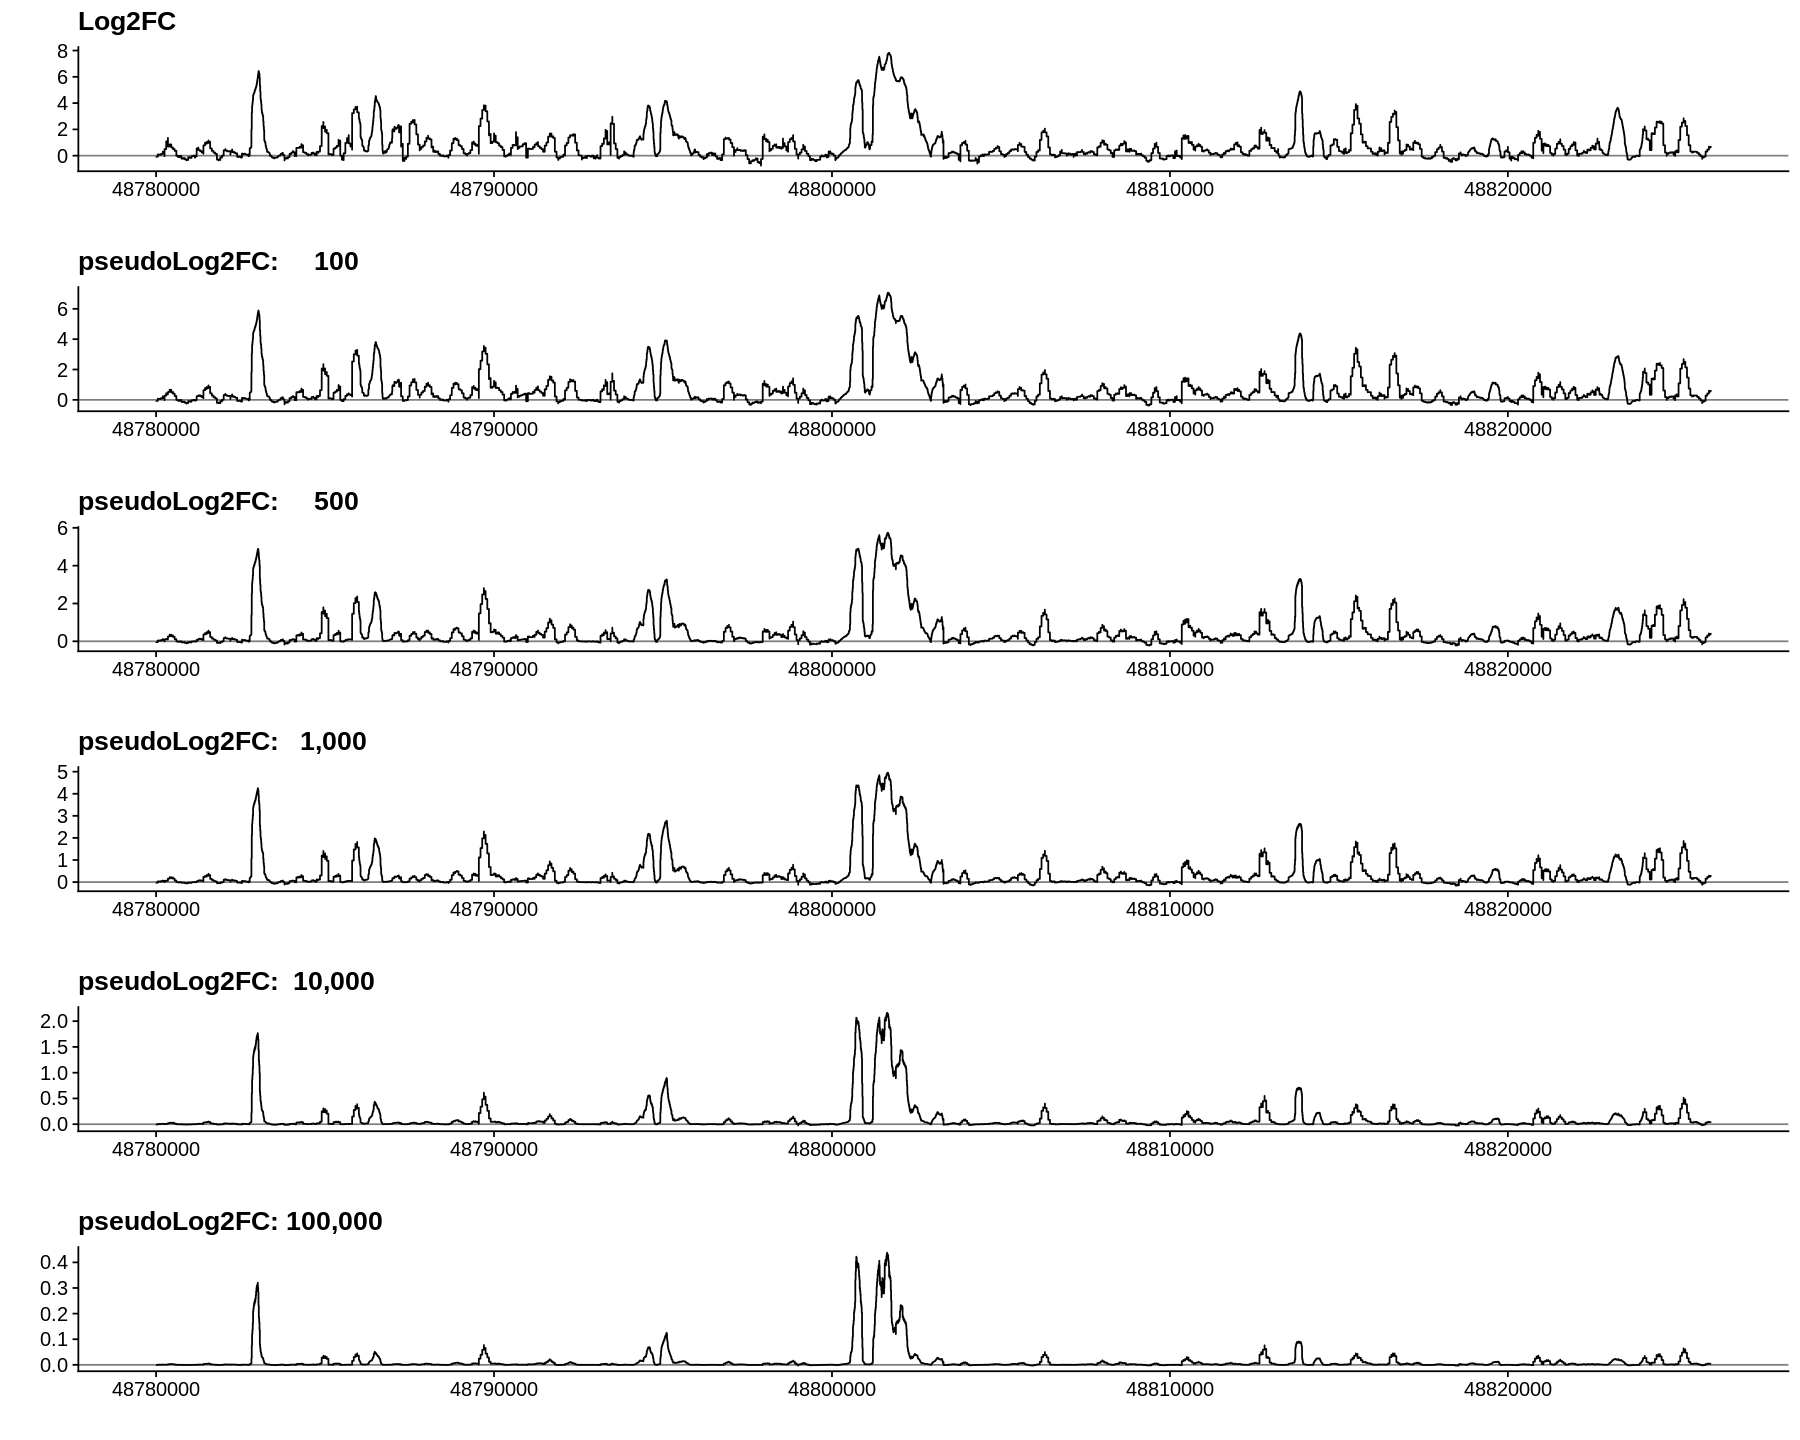

In [33]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(plotlist = lst, align="v", ncol=1)

In [24]:
mean(dat$Input)

[1] 468.8797